주제 : Car Price Prediction using Ridge Regression

참고 : https://www.kaggle.com/code/gauravduttakiit/car-price-prediction-using-ridge-regression/notebook

#Data Understanding and Exploration

In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
import random
# hide warnings
import warnings
warnings.filterwarnings('ignore')

##주석1

모든 열과 행을 볼 수 있는 방법

방법1

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

방법2

pd.options.display.max_columns = None

pd.options.display.max_rows = None

In [520]:
# reading the dataset
cars = pd.read_csv('CarPrice_Assignment.csv')

In [465]:
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [426]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [427]:
# head
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#Understanding the Data Dictionary

In [466]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

##주석2

Dataframe에서 type 다루기

타입 확인

df.dtypes

모든 타입이 같을 때는 df.astype('타입')

(물론 무조건 되는 건 아니고 서로 바뀔 수 있는 타입이라는 가정)

df = df.astype({'symboling':'category'})처럼 딕셔너리를 이용해 바꿀 수도 있음

#Category형 타입

카테고리형(Categorical) 데이터는 데이터프레임의 칼럼에서 특정한 형태의 데이터가 반복되는 경우 사용한다. 예를 들어 성별(남성, 여성), 나이(10대, 20대, ...)와 같이 특정 구간의 데이터가 반복되는 경우를 말한다.

카테고리형 데이터를 이용하면 반복된 데이터를 코드화하여 데이터의 사이즈를 줄여서 메모리 사용량이 줄어 들고 데이터 처리 속도가 빨라진다.

아래는 pandas의 데이터 타입 종류

(출처 : https://computer-science-student.tistory.com/302)


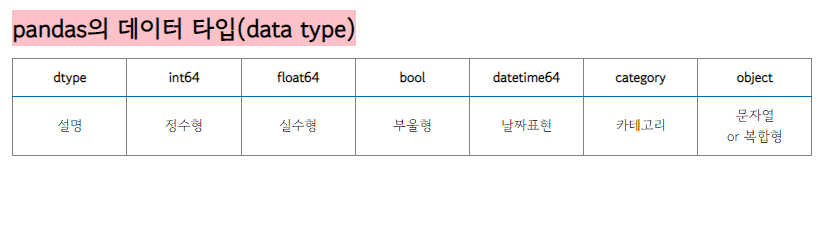

In [521]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [522]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

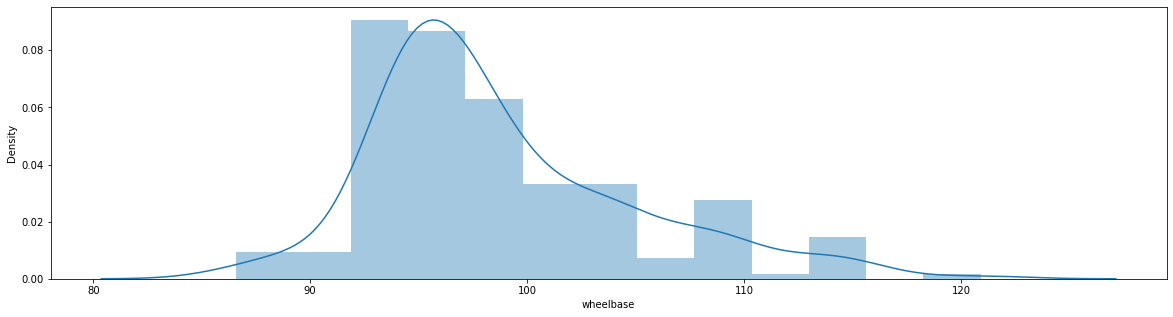

In [431]:
# wheelbase: distance between centre of front and rarewheels
plt.figure(figsize=(20,5))
sns.distplot(cars['wheelbase'])
plt.show()

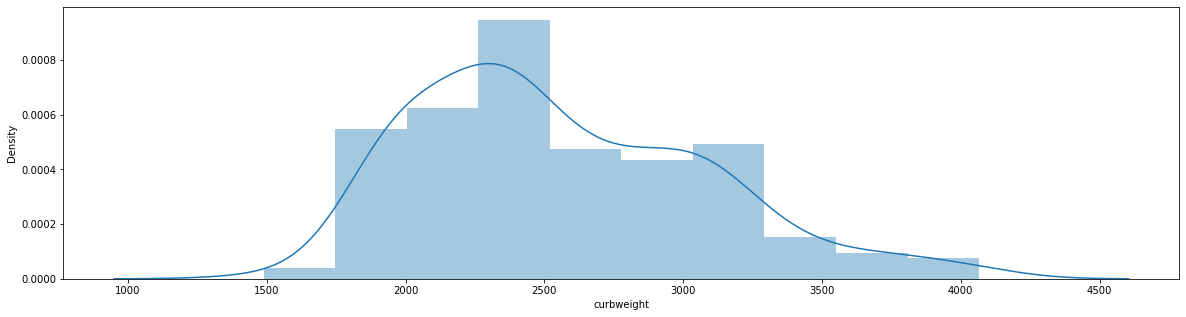

In [432]:
# curbweight: weight of car without occupants or baggage
plt.figure(figsize=(20,5))
sns.distplot(cars['curbweight'])
plt.show()

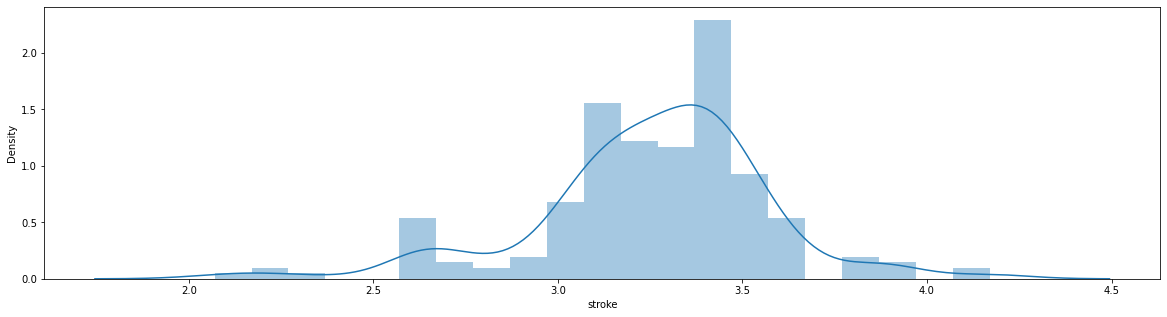

In [433]:
# stroke: volume of the engine (the distance traveled by the piston in each cycle)
plt.figure(figsize=(20,5))
sns.distplot(cars['stroke'])
plt.show()

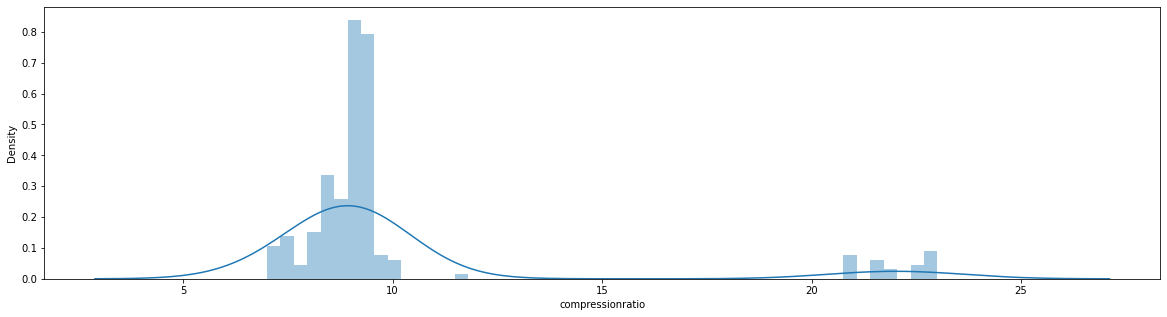

In [434]:
# compression ration: ratio of volume of compression chamber at largest capacity to least capacity
plt.figure(figsize=(20,5))
sns.distplot(cars['compressionratio'])
plt.show()

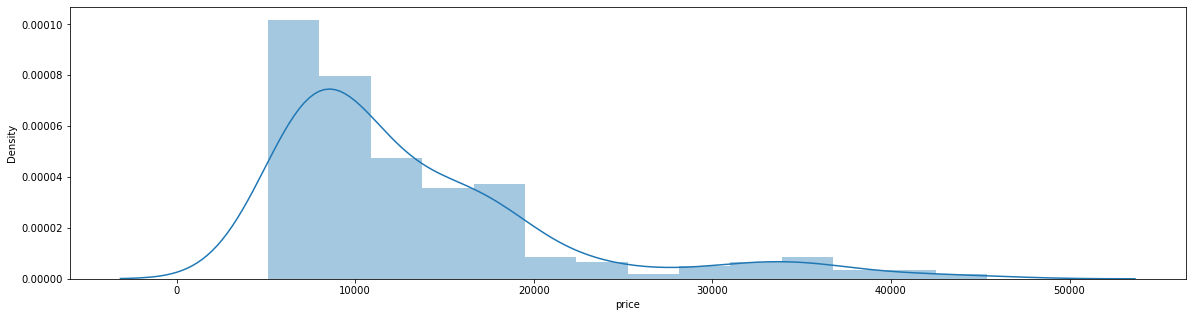

In [435]:
# target variable: price of car
plt.figure(figsize=(20,5))
sns.distplot(cars['price'])
plt.show()

##주석 3

displot 함수 옵션

bins = 20 : 나눌 bin의 개수가 20

hist = True : 막대그래프 표현

kde = True : 커널함수 표현

rug = True : X축에 데이터를 1차원으로 표시해줌
(rug의 color, 폭, 높이 등을 kde_kws를 통해 별도로 조절 가능)

vertical = True : 세로축으로 그래프 표현

ax = axes[1,1] : 각각 [0,0], [0,1], [1,0], [1,1]의 값으로 지정해 여러 그래프 시각화 가능



#Data Exploration

In [523]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float', 'int'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [524]:
# dropping symboling and car_ID 
cars_numeric = cars_numeric.drop(['symboling','car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


##주석4

symboling variable을 버린 이유

비록 symboling 변수가 numeric 변수이더라도, 의미 상 categorical 변수이므로 별도로 관리

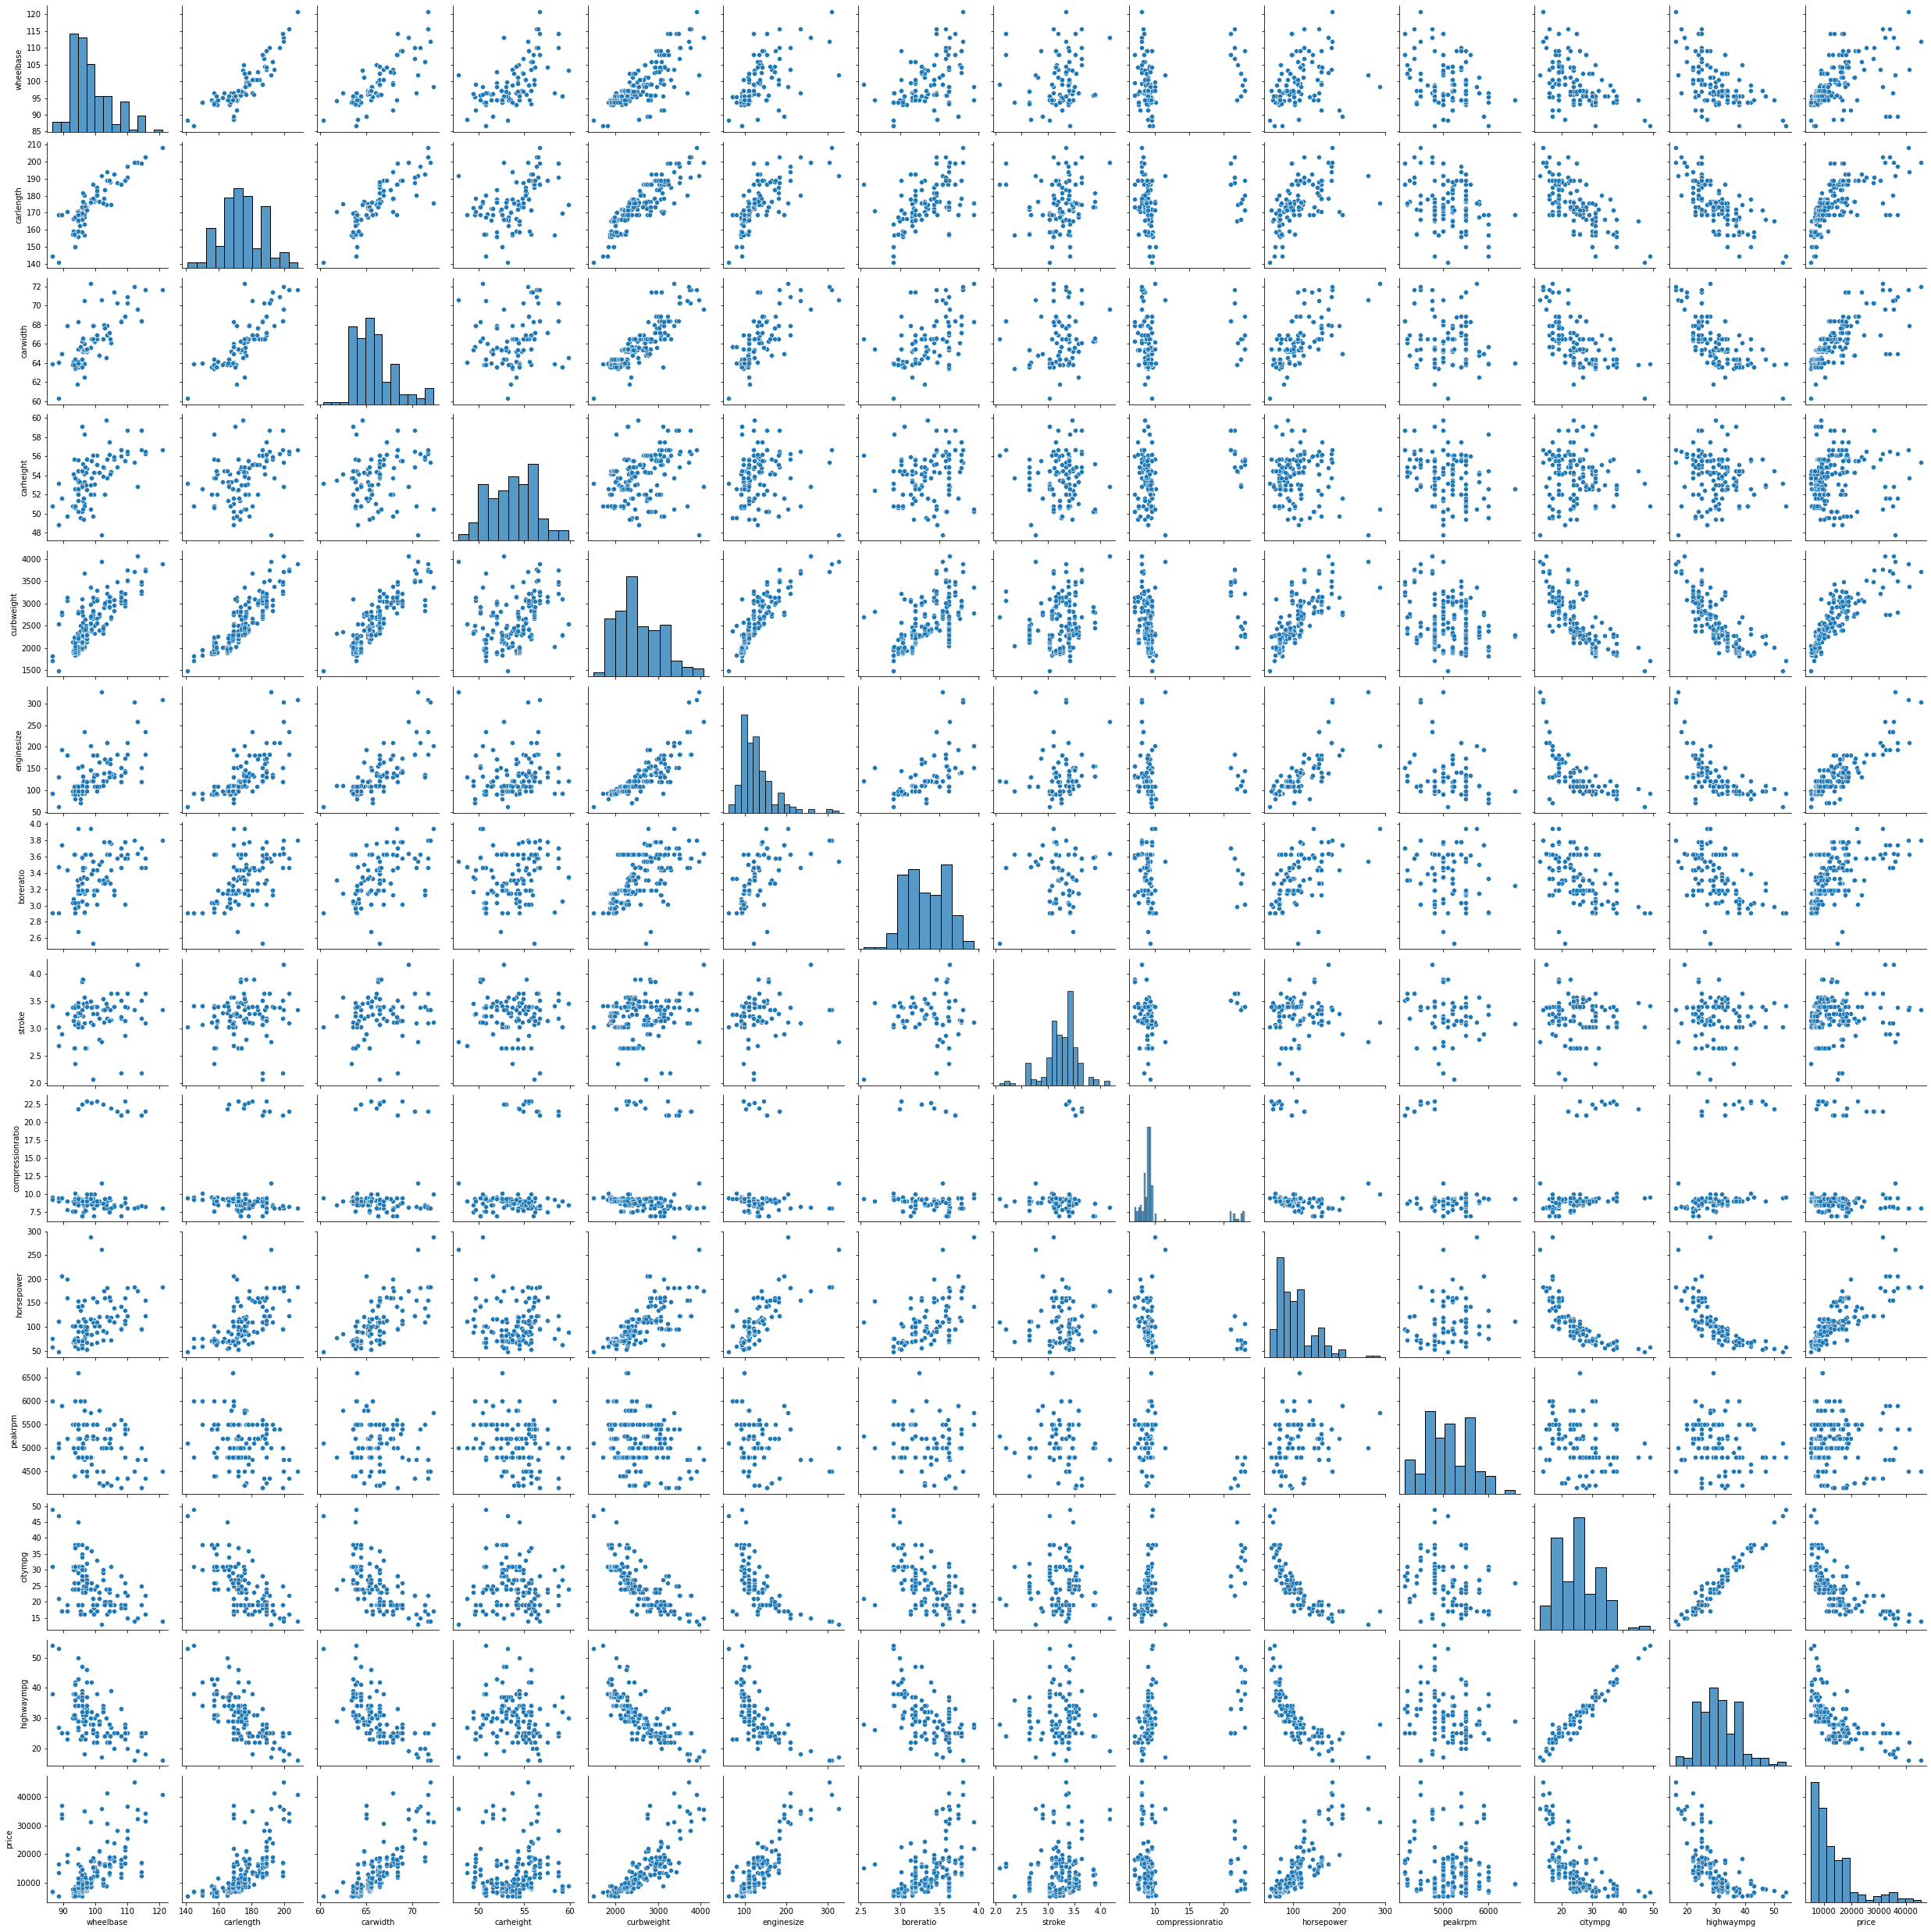

In [469]:
#paiwise scatter plot
sns.pairplot(cars_numeric)
plt.show()

In [470]:
# correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


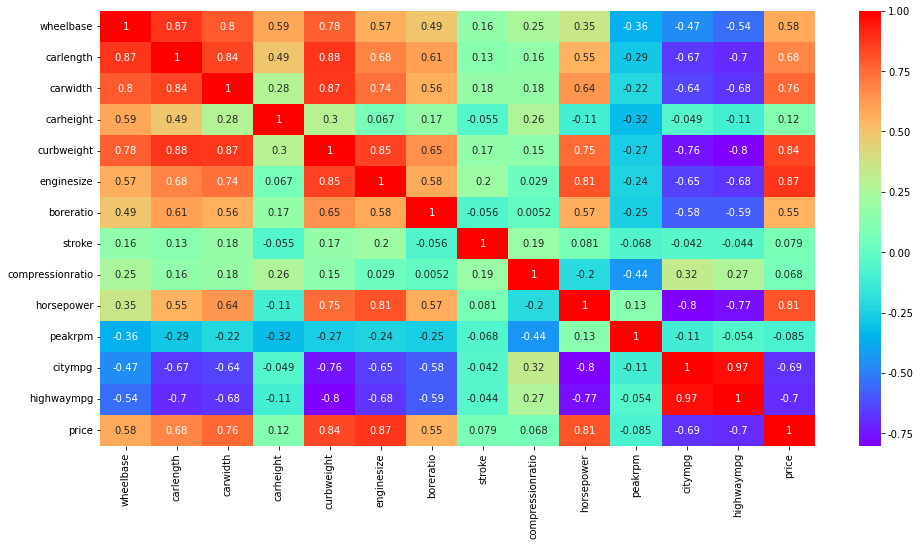

In [471]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="rainbow", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:

Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower 

(notice how all of these variables represent the size/weight/engine power of the car)

mpg = 연비

Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower 

(think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:

Many independent variables are highly correlated 

(look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated
Thus, while building the model, we'll have to pay attention to multicollinearity 

(especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

#Data Cleaning

In [472]:
# variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [525]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [526]:
# CarName: first few entries
cars['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

In [527]:
# Extracting carname

#str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [528]:
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           maxda
51           maxda
52          

##주석5

carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])

CarName이 차 이름과 회사 이름이 띄어쓰기를 기준으로 분리되어 있으므로 split함수를 통해 띄어쓰기로 구분 된 list형태로 변환 후 앞부분 추출

#Re모듈

compile(패턴, 플래그)

만약 패턴과 플래그가 동일한 정규식을 여러번 사용하려면 compile()를 사용하여 지정한 다음, 위의 함수들을 사용할 수 있습니다.

findall(패턴, 문자열, 플래그)

findall()은 문자열 안에 패턴에 맞는 케이스를 전부 찾아서 리스트로 반환합니다. 

#정규표현식

p = re.compile(r'\w+-?\w+')의 의미

\w+ : \w는 문자+숫자를, +는 1개 이상을 의미

-? : hypen(" - ")이 있어도, 없어도 됨

결론 : 문자숫자열 + '-' + 문자숫자열로 구성된 모든 문자 클래스에 대한 정규표현식

[자주 사용하는 문자 클래스]

[0-9] 또는 [a-zA-Z] 등은 무척 자주 사용하는 정규 표현식

\d - 숫자와 매치, [0-9]와 동일한 표현식이다.

\D - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식이다.

\s - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식이다.
 맨 앞의 빈 칸은 공백문자(space)를 의미한다.

\S - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.

\w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.

\W - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식이다.

대문자로 사용된 것은 소문자의 반대임을 추측할 수 있다.

In [529]:
# New column car_company
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [530]:
# look at all values 
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car_company, dtype: int64

In [531]:
# replacing misspelled car_company names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

'''
데이터 프레임 인덱싱 방법
df.loc["row", "column"]순으로 지정,
df.iloc[row index값, column index값]
'''

'\n데이터 프레임 인덱싱 방법\ndf.loc["row", "column"]순으로 지정,\ndf.iloc[row index값, column index값]\n'

In [532]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [533]:
# drop carname variable
cars = cars.drop('CarName', axis=1)

In [534]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [535]:
# outliers
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [536]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#Data Preparation

In [537]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']

In [538]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [539]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()



,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [540]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

In [541]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [542]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [543]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']]=scaler.fit_transform(X_train[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']])
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,1.025419,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,-0.677177,-0.359789,1.114978,-1.382026,0.439415,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,-0.557490,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,-0.557490,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.972390,1.225364,0.616439,1.627983,1.137720,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,-1.276993,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [544]:
X_test[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']]=scaler.transform(X_test[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']])
X_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,-0.475189,-0.566894,-0.652569,-0.227502,-0.820850,-0.660242,-0.451443,-0.706633,-0.278345,-0.822372,-0.688236,1.887918,2.320526,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,-0.205872,-0.136752,-0.154030,0.885789,-0.487359,-0.390836,-0.451443,0.481417,-0.278345,-0.443427,0.250069,0.240833,0.449816,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,0.046613,0.349149,0.299187,0.061129,-0.284685,-0.072447,0.317543,0.449308,-0.384120,-0.468690,-0.688236,0.091098,0.162014,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,-0.677177,-0.375720,-0.833856,-0.392434,-0.505784,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,-0.879165,-1.283797,-0.924500,0.885789,-0.551846,-0.415328,1.201877,-1.958901,-0.357676,-0.746583,-1.522285,0.091098,0.018113,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [545]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [546]:
len(X_train.columns)

68

해당 표준화 부분에 있어서 X_train 데이터와 X_test 데이터 모두에 같은 과정을 거치므로 반복문이나 함수를 통해 더 단순화하는 게 좋지 않을까하고 생각함.

추가로, 수치형 데이터들을 단순 문자열의 나열로 표현한 것은 조금 세련되지 않아 보임

#Model Building and Evaluation(Ridge)

In [547]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 2)            
model_cv.fit(X_train, y_train) 

'''
verbose = 0(default) : 메시지 출력 안함
verbose = 1 : 간단한 메시지 출력
verbose = 2 : 하이퍼 파라미터별 메시지 출력
'''

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ......................................

[CV] END ..........................................alpha=8.0; total time=   0.0s
[CV] END ..........................................alpha=8.0; total time=   0.0s
[CV] END ..........................................alpha=8.0; total time=   0.0s
[CV] END ..........................................alpha=8.0; total time=   0.0s
[CV] END ..........................................alpha=9.0; total time=   0.0s
[CV] END ..........................................alpha=9.0; total time=   0.0s
[CV] END ..........................................alpha=9.0; total time=   0.0s
[CV] END ..........................................alpha=9.0; total time=   0.0s
[CV] END ..........................................alpha=9.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ...................

'\nverbose = 0(default) : 메시지 출력 안함\nverbose = 1 : 간단한 메시지 출력\nverbose = 2 : 하이퍼 파라미터별 메시지 출력\n'

In [548]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011766,0.009149,0.004389,0.001018,0.0001,{'alpha': 0.0001},-2477.083675,-1407.576709,-1533.518285,-3791.731153,-2497.319067,-2341.445778,856.840716,25,-695.255755,-813.927025,-831.944178,-903.579372,-719.996190,-792.940504,76.244164
1,0.007380,0.001017,0.004987,0.000893,0.001,{'alpha': 0.001},-2469.022890,-1401.288430,-1548.374451,-3713.626872,-2504.226460,-2327.307821,829.157764,24,-700.093123,-812.600052,-828.560213,-901.408299,-718.693748,-792.271087,74.231396
2,0.008377,0.001352,0.005389,0.000797,0.01,{'alpha': 0.01},-2436.292716,-1373.845123,-1591.757067,-3391.885995,-2511.618168,-2261.079814,722.131565,23,-722.499208,-820.506751,-820.217414,-888.118643,-713.906682,-793.049740,65.986464
3,0.007580,0.002570,0.005386,0.000798,0.05,{'alpha': 0.05},-2344.179515,-1380.655182,-1520.650406,-3163.025924,-2436.840308,-2169.070267,653.048016,21,-749.228751,-851.223162,-848.597643,-894.907014,-744.953476,-817.782009,60.032866
4,0.007777,0.001718,0.004987,0.000631,0.1,{'alpha': 0.1},-2352.853355,-1392.596625,-1444.148287,-3010.512654,-2361.823807,-2112.386946,615.030673,20,-772.824695,-883.854455,-900.993508,-921.751361,-783.102278,-852.505260,62.120321


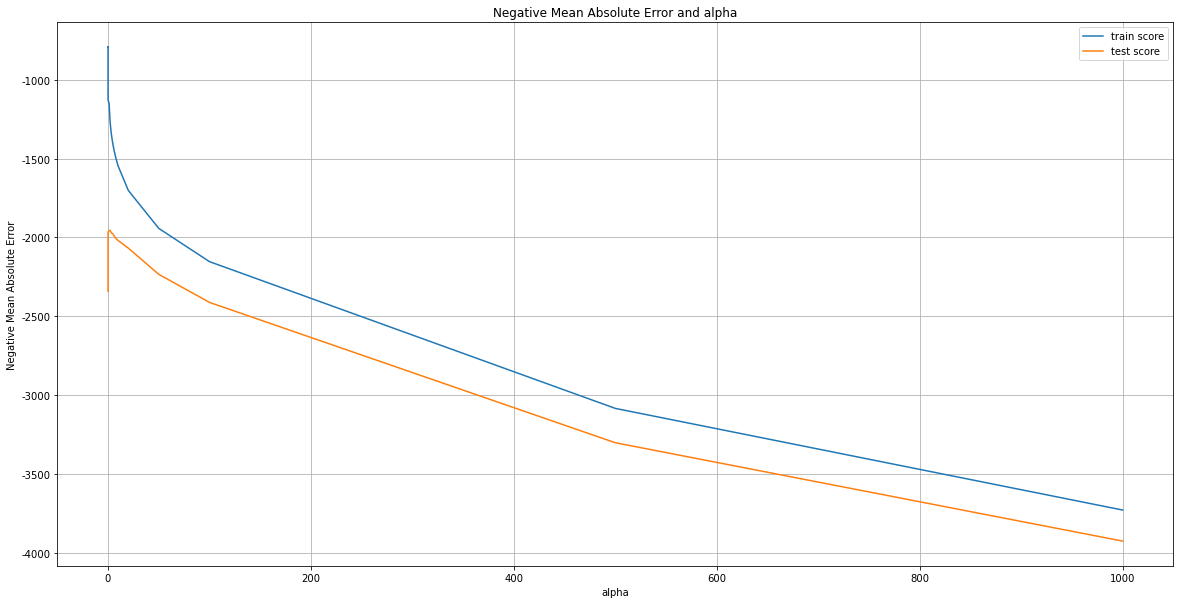

In [549]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [550]:
cv_results = cv_results[cv_results['param_alpha']<=200]

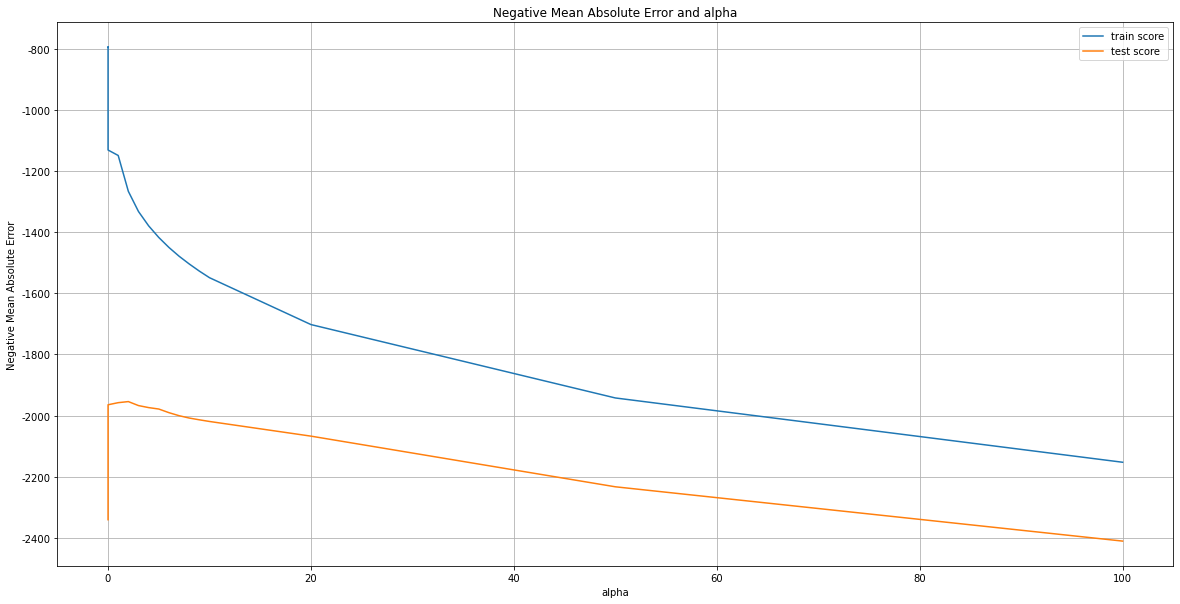

In [551]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [552]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([  352.16468118,  -146.31068684,  1194.67022283,    27.78778914,
        1429.62952602,  2256.96590742,    29.1039829 ,  -474.1817189 ,
         355.5905822 ,  1404.32742061,   283.28271375,   -41.39042541,
           6.20477009,   192.75145206,  -107.6273446 ,   -57.39385931,
         -42.41200026,   450.43702116,  -154.17843273,   105.27387696,
         372.17070885,   364.85883559,  -734.13285583,   153.42519164,
        -439.15250392,  -707.929286  ,   856.52537661,   564.62477053,
         -37.91842608,  -393.50098189,  1072.69646241,    79.73919937,
        -571.84042031,   194.61820917,    93.53681569, -1363.78978861,
         330.20010158,   261.87690122,  -165.50262539,   194.61820917,
         -13.63045317,    75.80726018,   154.17843273,     0.        ,
          95.78272675,  -264.85914201,     0.        ,    43.87442759,
        1593.82774427,   906.04858204,   213.52331376,   -80.28608982,
         -92.50505388,    66.05150816,   336.53928891,     5.07202944,
      

##주석 6

기울기: line_fitter.coef_

절편: line_fitter.intercept_

In [553]:
imp_ridge = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": ridge.coef_})
imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
5,enginesize,2256.965907
48,car_company_bmw,1593.827744
4,curbweight,1429.629526
9,horsepower,1404.327421
2,carwidth,1194.670223
30,enginetype_ohc,1072.696462
49,car_company_buick,906.048582
26,drivewheel_rwd,856.525377
61,car_company_porsche,652.749197
27,enginelocation_rear,564.624771


##주석7

기울기가 0인 요소들(price에 영향을 미치지 않는 변수들) 삭제

In [554]:
imp_ridge=imp_ridge.drop([imp_ridge.index[56], imp_ridge.index[43],imp_ridge.index[46]])
imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
5,enginesize,2256.965907
48,car_company_bmw,1593.827744
4,curbweight,1429.629526
9,horsepower,1404.327421
2,carwidth,1194.670223
30,enginetype_ohc,1072.696462
49,car_company_buick,906.048582
26,drivewheel_rwd,856.525377
61,car_company_porsche,652.749197
27,enginelocation_rear,564.624771


In [555]:
y_pred = ridge.predict(X_test)

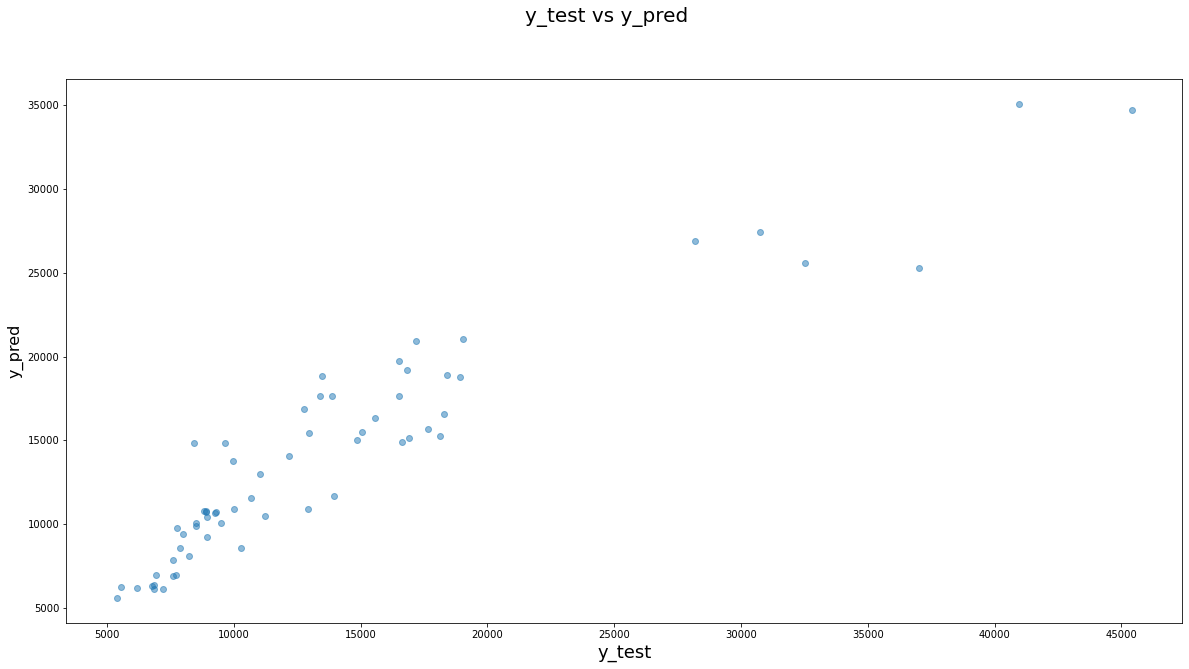

In [556]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [557]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
160,7738.0,6958.92
186,8495.0,10070.69
59,8845.0,10758.38
165,9298.0,10691.31
140,7603.0,7866.12


In [558]:
from sklearn import metrics 

In [559]:
metrics.explained_variance_score(y_test,y_pred)

0.856611861452632

In [560]:
metrics.mean_absolute_error(y_test,y_pred)

2185.0533154241793

In [561]:
metrics.max_error(y_test,y_pred)

11718.33075150381

In [562]:
Ridge_Rmse = metrics.mean_squared_error(y_test,y_pred, squared = False) #Ridge_Rmse
print(Ridge_Rmse)

3175.5034192922462


In [563]:
metrics.mean_squared_log_error(y_test,y_pred)

0.03258650638573039

In [564]:
metrics.median_absolute_error(y_test,y_pred)

1628.7569726011816

In [565]:
metrics.r2_score(y_test,y_pred)

0.8560052538582434

In [566]:
metrics.mean_poisson_deviance(y_test,y_pred)

502.2338152075131

In [567]:
metrics.mean_gamma_deviance(y_test,y_pred)

0.0310207825918648

In [568]:
metrics.mean_tweedie_deviance(y_test,y_pred)

10083821.965936746

#Model Building and Evaluation(Lasso)

In [569]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

'''
verbose = 0(default) : 메시지 출력 안함
verbose = 1 : 간단한 메시지 출력
verbose = 2 : 하이퍼 파라미터별 메시지 출력
'''

Fitting 5 folds for each of 28 candidates, totalling 140 fits


'\nverbose = 0(default) : 메시지 출력 안함\nverbose = 1 : 간단한 메시지 출력\nverbose = 2 : 하이퍼 파라미터별 메시지 출력\n'

In [570]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019347,0.005069,0.003000,0.000641,0.0001,{'alpha': 0.0001},-2324.761889,-1442.035114,-1582.919290,-3365.728469,-2331.967620,-2209.482476,685.091765,26,-707.535745,-813.095639,-825.364295,-900.615936,-714.973572,-792.317037,72.694432
1,0.018543,0.004859,0.002401,0.000497,0.001,{'alpha': 0.001},-2325.688041,-1441.742191,-1582.998316,-3364.873452,-2330.975672,-2209.255534,684.850338,25,-707.569929,-813.089235,-825.341539,-900.573352,-714.968354,-792.308482,72.672447
2,0.014176,0.001943,0.002987,0.000016,0.01,{'alpha': 0.01},-2335.264149,-1438.892464,-1583.792863,-3356.340745,-2321.638560,-2207.185756,682.488680,24,-707.984397,-813.098277,-825.235462,-900.167837,-714.996805,-792.296556,72.439890
3,0.013571,0.000479,0.002589,0.000469,0.05,{'alpha': 0.05},-2376.328703,-1427.855175,-1587.102331,-3320.903875,-2306.491806,-2203.736378,673.890079,23,-710.183057,-813.675832,-825.247821,-898.564093,-715.251460,-792.584453,71.433617
4,0.013578,0.000794,0.002786,0.000394,0.1,{'alpha': 0.1},-2390.837400,-1424.141752,-1589.657845,-3284.702371,-2302.610950,-2198.390064,663.021532,20,-713.094780,-814.280601,-825.537280,-896.654442,-715.773548,-793.068130,70.149166


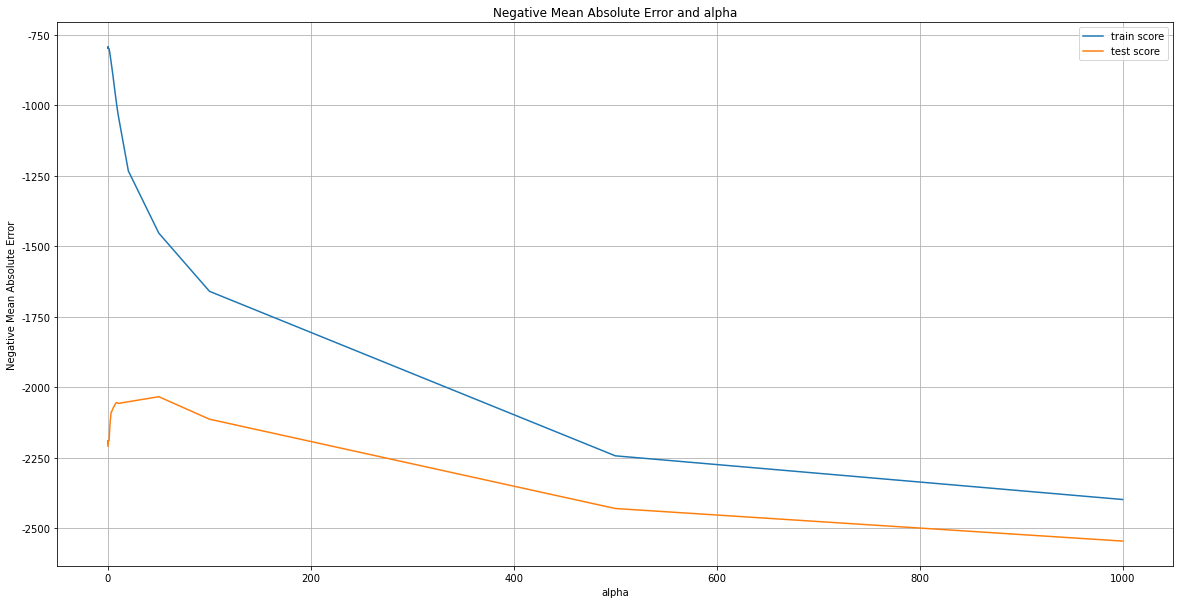

In [571]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [572]:
cv_results = cv_results[cv_results['param_alpha']<=200]

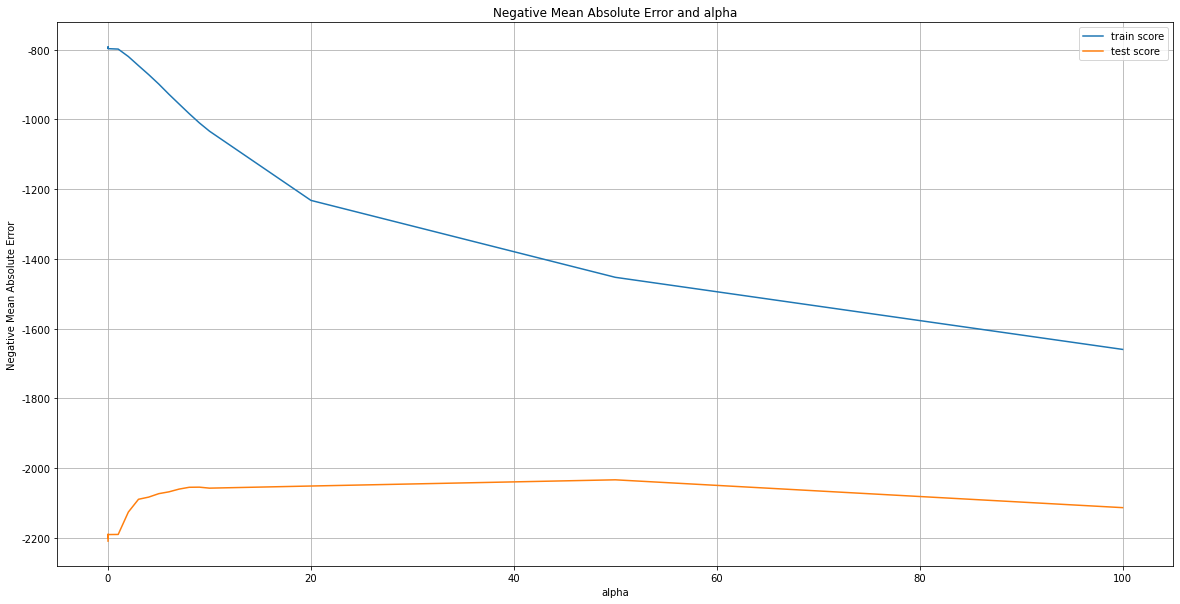

In [573]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [574]:
alpha = 15
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([  347.97084227, -1057.63619798,  1935.52712919,  -281.68966783,
        3347.70394715,  3132.11138747,  -799.45461838,  -472.29649172,
           0.        ,     0.        ,   634.47545737,     0.        ,
         370.8780794 ,   669.15667278,    -0.        ,    -0.        ,
           0.        ,   653.80976132,    -0.        ,  1255.06532186,
           0.        ,     0.        ,  -979.58200245,  -258.54033314,
        -645.67449469,   -85.51845159,   906.81794688,  9275.7047089 ,
          -0.        ,     0.        ,     0.        ,    -0.        ,
       -1855.1979971 ,  1667.87911095,    -0.        ,    -0.        ,
       -1011.89831249,  2014.85641739, -1385.37908096,   731.38532847,
         295.75060556,     0.        ,     0.        ,     0.        ,
          -0.        ,    -0.        ,     0.        ,    79.29625549,
        8532.78521645,  2025.30504654,     0.        , -1200.39359062,
        -950.5841785 ,     0.        ,   847.40422758,     0.        ,
      

In [575]:
imp_lasso = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": lasso.coef_})
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
27,enginelocation_rear,9275.704709
48,car_company_bmw,8532.785216
4,curbweight,3347.703947
5,enginesize,3132.111387
61,car_company_porsche,3033.551327
49,car_company_buick,2025.305047
37,cylindernumber_three,2014.856417
2,carwidth,1935.527129
33,enginetype_rotor,1667.879111
63,car_company_saab,1548.759202


In [576]:
drop_num = [50,46,45,44,43,42,53,55,41,56,66,35,34,67,21,8,9,11,14,15,16,18,20,28,29,30,31]
drop_num.sort(reverse = True)
for i in drop_num:
  imp_lasso=imp_lasso.drop([imp_lasso.index[i]])


imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
27,enginelocation_rear,9275.704709
48,car_company_bmw,8532.785216
4,curbweight,3347.703947
5,enginesize,3132.111387
61,car_company_porsche,3033.551327
49,car_company_buick,2025.305047
37,cylindernumber_three,2014.856417
2,carwidth,1935.527129
33,enginetype_rotor,1667.879111
63,car_company_saab,1548.759202


In [577]:
y_pred = lasso.predict(X_test)

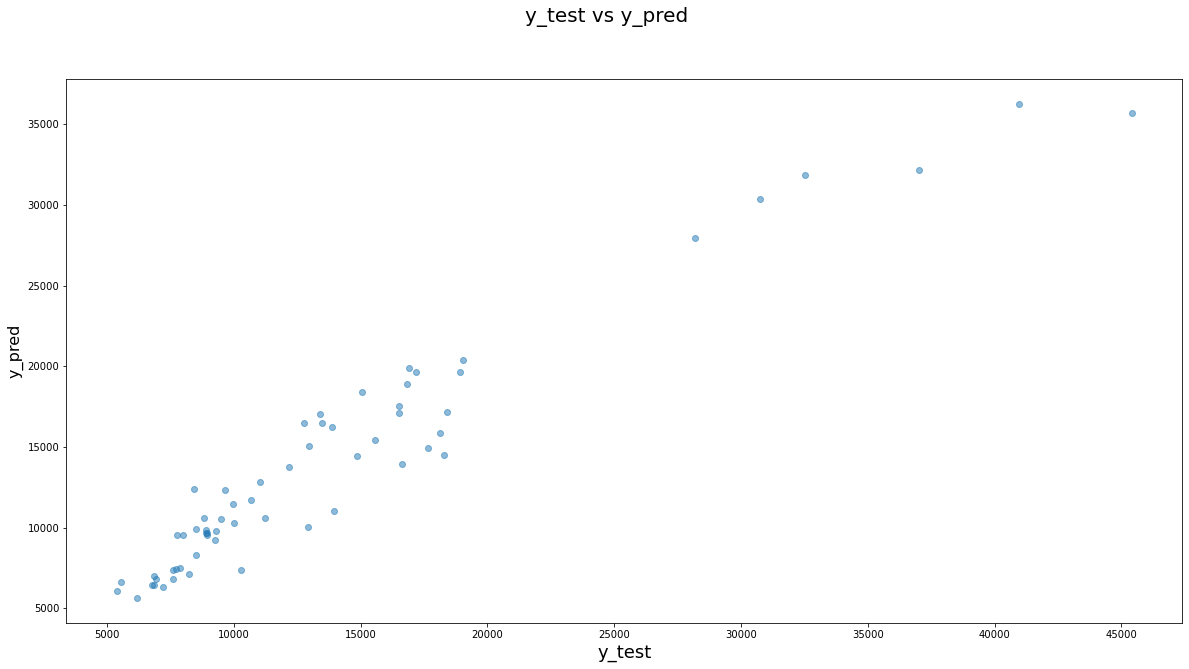

In [578]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [579]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
160,7738.0,7435.23
186,8495.0,9929.90
59,8845.0,10562.12
165,9298.0,9800.81
140,7603.0,6835.52


In [580]:
from sklearn import metrics 

In [581]:
metrics.explained_variance_score(y_test,y_pred)

0.9235329559782863

In [582]:
metrics.mean_absolute_error(y_test,y_pred)

1670.465267346453

In [583]:
metrics.max_error(y_test,y_pred)

9679.706130277038

In [584]:
Lasso_Rmse = metrics.mean_squared_error(y_test,y_pred, squared = False) #Ridge_Rmse
print(Lasso_Rmse)

2316.207372865737


In [585]:
metrics.mean_squared_log_error(y_test,y_pred)

0.021577520955497833

In [586]:
metrics.median_absolute_error(y_test,y_pred)

1083.8716285703408

In [587]:
metrics.r2_score(y_test,y_pred)

0.9233916062603468

In [588]:
metrics.mean_poisson_deviance(y_test,y_pred)

297.8486637228606

In [589]:
metrics.mean_gamma_deviance(y_test,y_pred)

0.021383199062054232

In [590]:
metrics.mean_tweedie_deviance(y_test,y_pred)

5364816.594117599

#Model Building and Evaluation(Elastic Net)

In [591]:
elasticnet = ElasticNet()
alphas = np.logspace(-4, 0, 200)
params = {'alpha':alphas}




folds = 5
model_cv = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-04, 1.04737090e-04, 1.09698580e-04, 1.14895100e-04,
       1.20337784e-04, 1.26038293e-04, 1.32008840e-04, 1.38262217e-04,
       1.44811823e-04, 1.51671689e-04, 1.58856513e-04, 1.66381689e-04,
       1.74263339e-04, 1.82518349e-04, 1.91164408e-04, 2.00220037e-04,
       2.09704640e-04, 2.19638537e-04, 2.30043012e-...
       4.15040476e-01, 4.34701316e-01, 4.55293507e-01, 4.76861170e-01,
       4.99450512e-01, 5.23109931e-01, 5.47890118e-01, 5.73844165e-01,
       6.01027678e-01, 6.29498899e-01, 6.59318827e-01, 6.90551352e-01,
       7.23263390e-01, 7.57525026e-01, 7.93409667e-01, 8.30994195e-01,
       8.70359136e-01, 9.11588830e-01, 9.54771611e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [592]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018332,0.003496,0.003596,0.000810,0.0001,{'alpha': 0.0001},-2425.510148,-1412.356179,-1596.627369,-3318.504789,-2511.040084,-2252.807714,688.353364,186,-718.404322,-818.700266,-821.342428,-892.307270,-714.091484,-792.969154,67.995287
1,0.016155,0.003639,0.002998,0.000631,0.000105,{'alpha': 0.00010473708979594497},-2426.437739,-1411.054173,-1596.920458,-3320.680448,-2514.064616,-2253.831487,689.563138,187,-718.764452,-818.877632,-821.192157,-891.973733,-714.045646,-792.970724,67.830600
2,0.016550,0.003378,0.002786,0.000746,0.00011,{'alpha': 0.00010969857978923841},-2427.295969,-1409.700580,-1597.197278,-3322.610575,-2516.732261,-2254.707333,690.683302,189,-719.130729,-819.056661,-821.035697,-891.640530,-713.998520,-792.972427,67.665062
3,0.013356,0.000496,0.002800,0.000403,0.000115,{'alpha': 0.00011489510001873086},-2428.078396,-1408.295301,-1597.454830,-3324.274792,-2519.029280,-2255.426520,691.706551,192,-719.503117,-819.237269,-820.872766,-891.298099,-713.950188,-792.972288,67.495870
4,0.013763,0.000755,0.002796,0.000395,0.00012,{'alpha': 0.00012033778407775893},-2428.777599,-1406.837053,-1597.689867,-3325.652614,-2520.946902,-2255.980807,692.626250,194,-719.881621,-819.419035,-820.706085,-890.945523,-713.900739,-792.970601,67.322959


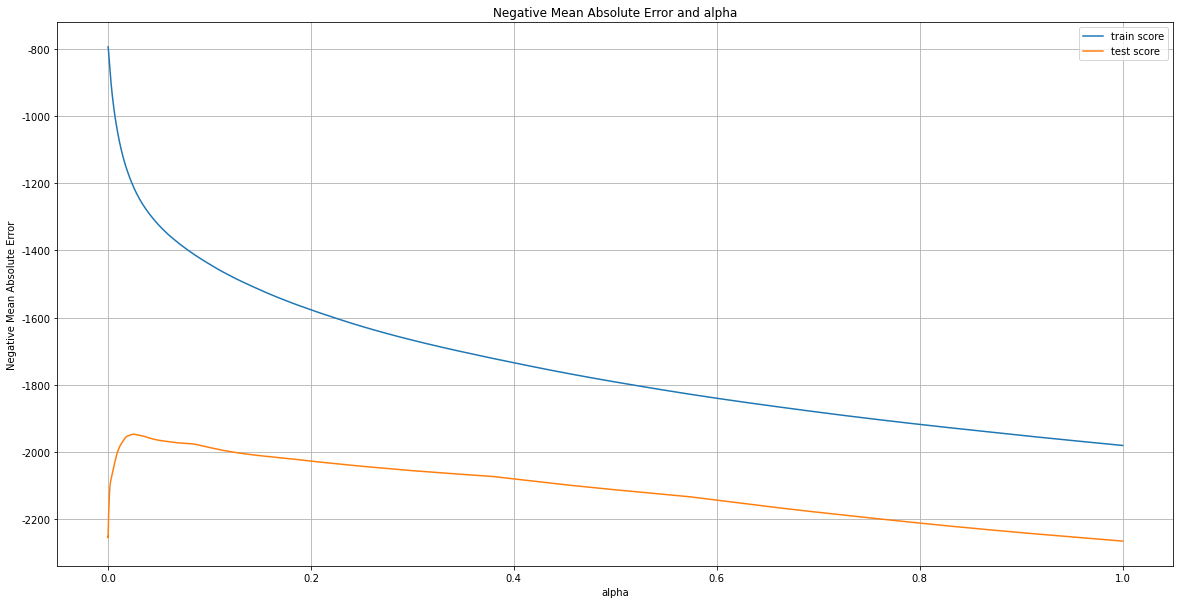

In [593]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [594]:
cv_results = cv_results[cv_results['param_alpha']<=200]

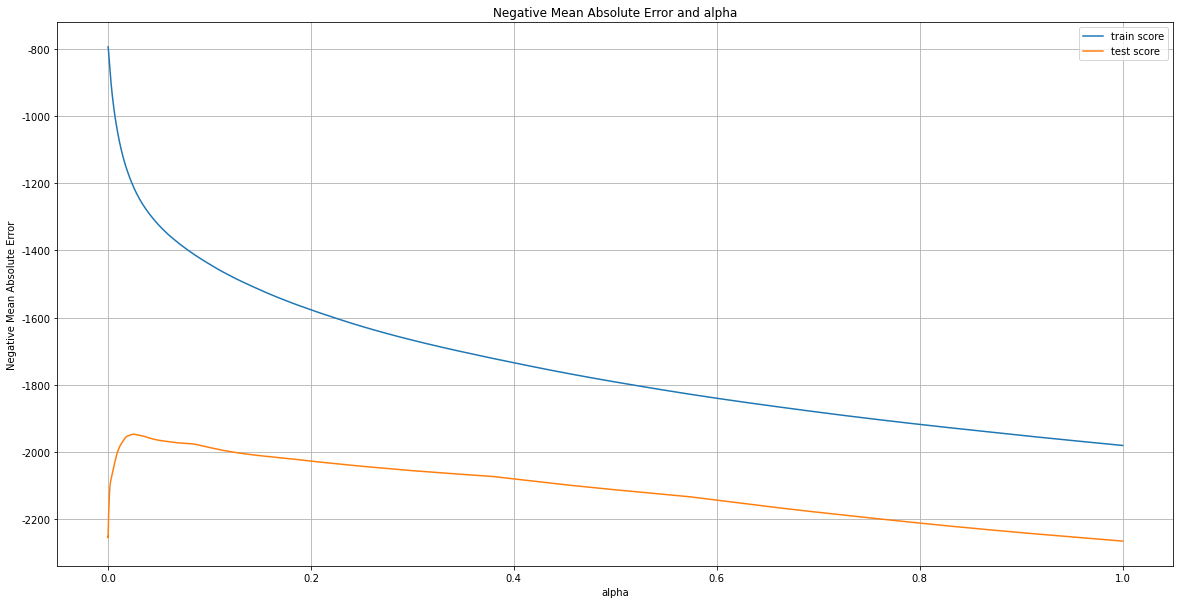

In [595]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [596]:
alpha = 0.002
elasitcnet = ElasticNet(alpha=alpha)

elasticnet.fit(X_train, y_train)
elasticnet.coef_

array([ 386.97093325,  307.95612304,  956.9291217 , -112.14733978,
       1042.17887614, 1585.77887603,  197.28233821, -113.62618401,
        399.61432905, 1261.47853844,  102.8854079 , -319.87258806,
       -321.58707023,  114.66596702,  -97.41527617,  -52.20731715,
        -19.69909594,  141.75736087, -102.92885786,  -18.78750643,
        226.62107111,  122.2869891 , -315.89465077,  243.79108418,
       -235.89362971, -506.37799512,  576.38840048,  165.48121546,
         31.01565058, -183.22972104,  283.4265363 ,  -54.3807601 ,
        -20.93340834,   10.57279269,  139.68751297, -794.45134681,
        323.50266379,   67.35984005,   11.71591931,   10.57284599,
       -157.92927602,   -6.59996888,  102.92945336,    0.        ,
        194.36927298, -127.45696696,    0.        ,   36.89676779,
        528.31304591,  340.90300124,   82.464841  ,  -20.68487436,
        -16.49077566,   37.06254293,  142.18021579,  -28.31207637,
          0.        , -217.55261824, -200.23439444, -251.58935

In [597]:
imp_elasticnet = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": elasticnet.coef_})
imp_elasticnet.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
5,enginesize,1585.778876
9,horsepower,1261.478538
4,curbweight,1042.178876
2,carwidth,956.929122
26,drivewheel_rwd,576.388400
48,car_company_bmw,528.313046
8,compressionratio,399.614329
0,wheelbase,386.970933
49,car_company_buick,340.903001
36,cylindernumber_six,323.502664


In [598]:
drop_num = [43, 46, 56]
drop_num.sort(reverse = True)
for i in drop_num:
  imp_elasticnet=imp_elasticnet.drop([imp_elasticnet.index[i]])


imp_elasticnet.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
5,enginesize,1585.778876
9,horsepower,1261.478538
4,curbweight,1042.178876
2,carwidth,956.929122
26,drivewheel_rwd,576.388400
48,car_company_bmw,528.313046
8,compressionratio,399.614329
0,wheelbase,386.970933
49,car_company_buick,340.903001
36,cylindernumber_six,323.502664


In [599]:
y_pred = elasticnet.predict(X_test)

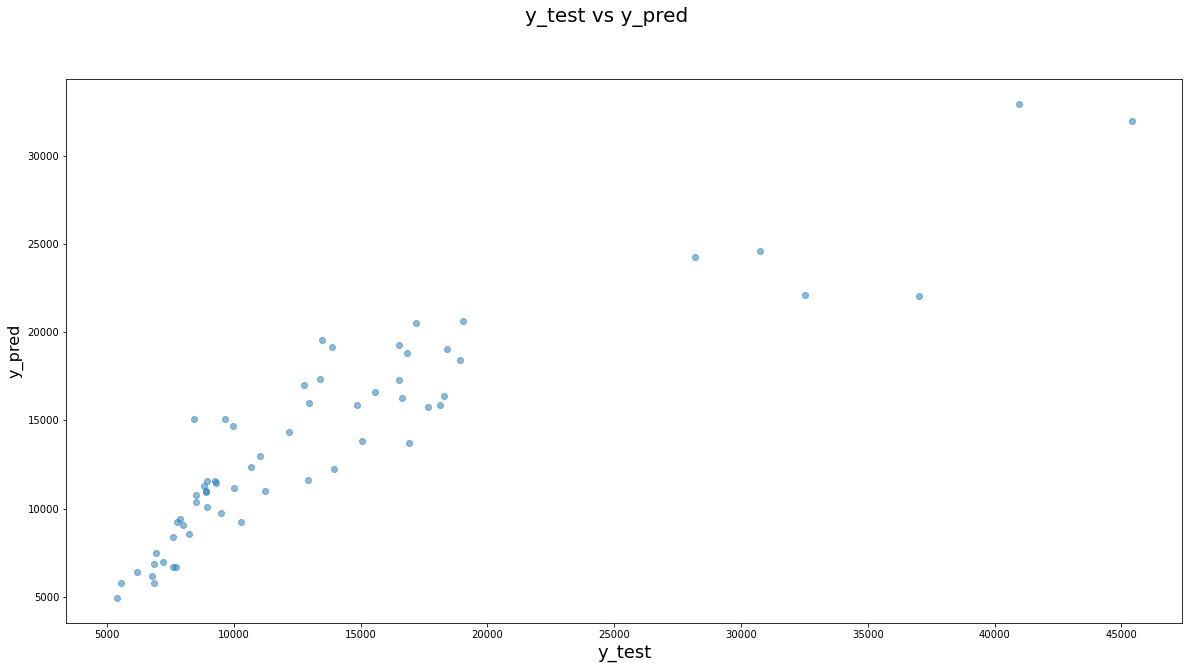

In [600]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [601]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
160,7738.0,6669.35
186,8495.0,10356.26
59,8845.0,11258.06
165,9298.0,11441.22
140,7603.0,8388.41


In [602]:
from sklearn import metrics 

In [603]:
metrics.explained_variance_score(y_test,y_pred)

0.7804896444605952

In [604]:
metrics.mean_absolute_error(y_test,y_pred)

2605.608262320697

In [605]:
metrics.max_error(y_test,y_pred)

14941.21270097472

In [606]:
Elastic_Rmse = metrics.mean_squared_error(y_test,y_pred, squared = False) #Ridge_Rmse
print(Elastic_Rmse)

3922.8911985011423


In [607]:
metrics.mean_squared_log_error(y_test,y_pred)

0.043274123281084986

In [608]:
metrics.median_absolute_error(y_test,y_pred)

1792.2990458986114

In [609]:
metrics.r2_score(y_test,y_pred)

0.7802474095015692

In [610]:
metrics.mean_poisson_deviance(y_test,y_pred)

730.1340354235282

In [611]:
metrics.mean_gamma_deviance(y_test,y_pred)

0.042061671010924

In [612]:
metrics.mean_tweedie_deviance(y_test,y_pred)

15389075.35527773

#Ridge, Lasso, ElasticNet 비교

In [613]:
print(Ridge_Rmse, Lasso_Rmse, Elastic_Rmse)

3175.5034192922462 2316.207372865737 3922.8911985011423


#AutoML

In [614]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [615]:
X1 = pd.concat([X_train, X_test], axis = 0)
y1 = pd.concat([y_train, y_test], axis = 0)
train = pd.concat([X1, y1], axis = 1)

In [616]:
!pip install --pre pycaret

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\sangmin\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for plotly-resampler: filename=plotly_resampler-0.8.2rc3-cp39-cp39-win_amd64.whl size=95972 sha256=f44717dfda886faee208eb2d4f913dbed88536e1510768d223938c1b26d01dbb
  Stored in directory: c:\users\sangmin\appdata\local\pip\cache\wheels\5b\0e\14\d9e8e3fb95a9aed0ec3158c2ead3c47572a4f42c24630a5960
  Created wheel for pyod: filename=pyod-1.0.6-py3-none-any.whl size=175098 sha256=c0440690253e6aaf19582cf6a249f5b2dd9db6a540bab4c7616e10a02e558dbe
  Stored in directory: c:\users\sangmin\appdata\local\pip\cache\wheels\ac\4b\13\f396d3390477091d279889fb43e48096648535dd3cf07da023
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=fc0d9e701

In [618]:
#Data Setup
from pycaret.regression import * 
clf1 = setup(data = train,
             target = 'price',)

ModuleNotFoundError: No module named 'pycaret'

In [188]:
comp = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,1635.2819,4687053.7000,2112.9645,0.8543,0.2189,0.1341,0.0970
et,Extra Trees Regressor,1483.9973,5117523.8591,2117.5522,0.8693,0.1514,0.1183,0.2170
br,Bayesian Ridge,1622.1405,5201287.4800,2158.2073,0.8731,0.2078,0.1338,0.0710
rf,Random Forest Regressor,1525.3572,5113001.8811,2174.0087,0.8833,0.1407,0.1131,0.2600
huber,Huber Regressor,1610.5746,5163543.4071,2187.3727,0.8638,0.1982,0.1343,0.0630
lasso,Lasso Regression,1594.9355,5564989.9125,2224.2441,0.8577,0.1773,0.1339,0.0830
ridge,Ridge Regression,1708.9529,5789232.1125,2283.6877,0.8677,0.1970,0.1368,0.0830
gbr,Gradient Boosting Regressor,1558.2592,5998519.0462,2345.4715,0.8652,0.1469,0.1152,0.0900
ada,AdaBoost Regressor,1836.8231,5888246.9388,2348.9185,0.8630,0.1778,0.1557,0.1020
lr,Linear Regression,1782.9069,8368349.2125,2588.2220,0.8085,0.1946,0.1469,0.9610


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [189]:
top1 = create_model('llar', cross_validation = False)
top2 = create_model('et', cross_validation = False)
top3 = create_model('br', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,2251.5967,10139913.0000,3184.3230,0.8663,0.2308,0.1774


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,1684.2897,6071757.4215,2464.0936,0.9199,0.1604,0.1252


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,1999.7851,7871717.0490,2805.6580,0.8962,0.1890,0.1620


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [190]:
tuned_llar = tune_model(top1, optimize = 'RMSE', n_iter = 10)
tuned_et = tune_model(top2, optimize = 'RMSE', n_iter = 10)
tuned_br = tune_model(top3, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1768.1968,5287351.0000,2299.4241,0.7726,0.2098,0.1621
1,2149.5872,9514483.0000,3084.5557,0.9150,1.0397,0.1795
2,1031.7437,1405162.8750,1185.3956,0.9841,0.1190,0.1027
3,1394.8463,2828133.7500,1681.7056,0.8359,0.1744,0.1297
4,1572.6331,4137436.0000,2034.0688,0.9505,0.2135,0.1148
5,1252.8466,2670672.2500,1634.2191,0.9479,0.1285,0.0996
6,1106.6199,3168324.0000,1779.9786,0.7937,0.1361,0.1018
7,2589.9136,20109774.0000,4484.3921,0.7706,0.2243,0.1744
8,1867.7299,5304620.0000,2303.1760,0.8434,0.1611,0.1441


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1997.4912,6040820.9616,2457.8082,0.7402,0.2016,0.1683
1,2102.8100,15095128.4807,3885.2450,0.8652,0.1415,0.1045
2,2221.0210,10438250.5933,3230.8282,0.8816,0.1829,0.1536
3,1308.8528,3229730.4012,1797.1451,0.8126,0.1359,0.1052
4,1921.4850,8158467.2499,2856.3031,0.9024,0.1335,0.1056
5,779.4819,989437.9501,994.7050,0.9807,0.0705,0.0624
6,878.9073,1754568.9198,1324.6014,0.8858,0.1051,0.0846
7,1165.6872,2136936.2333,1461.8263,0.9756,0.1128,0.0938
8,1963.7183,7539591.4570,2745.8317,0.7775,0.1640,0.1423


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1643.1568,4397476.4689,2097.0161,0.8109,0.1755,0.1393
1,2048.2201,8723478.3562,2953.5535,0.9221,0.4022,0.1621
2,1111.8505,1858169.1952,1363.1468,0.9789,0.1088,0.0951
3,1445.4390,4014201.6025,2003.5473,0.7671,0.1859,0.1287
4,1531.0223,4525228.1381,2127.2584,0.9459,0.2450,0.1027
5,1224.3741,2122344.0893,1456.8267,0.9586,0.1149,0.1040
6,1597.0894,4580547.0870,2140.2213,0.7017,0.1835,0.1547
7,1446.4158,2703436.6912,1644.2131,0.9692,0.1816,0.1560
8,1862.5334,5654953.1152,2378.0145,0.8331,0.1605,0.1436


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [191]:
blender_specific = blend_models(estimator_list = [tuned_llar, tuned_et, tuned_br],optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1772.6899,5218983.1308,2284.5094,0.7755,0.1862,0.1472
1,1613.5842,8246588.4946,2871.6874,0.9264,0.1191,0.0897
2,1013.5110,1746284.4608,1321.4706,0.9802,0.1117,0.0963
3,1383.4369,3639892.1082,1907.8501,0.7888,0.1593,0.1195
4,1473.9887,3794639.5765,1947.9835,0.9546,0.1248,0.0917
5,1039.7368,1860121.0497,1363.8625,0.9637,0.0926,0.0787
6,1406.1081,4210849.2600,2052.0354,0.7258,0.1595,0.1283
7,1176.1140,1590842.7628,1261.2862,0.9819,0.1300,0.1150
8,1700.1848,4850234.4107,2202.3248,0.8569,0.1523,0.1323


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [192]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data=train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,783.6471,1205486.5034,1097.9465,0.9810,0.0811,0.0642


In [198]:
AutoML_Rmse = metrics.mean_squared_error(pred['price'], pred['prediction_label'], squared = False)

In [200]:
print(Ridge_Rmse, Lasso_Rmse, Elastic_Rmse, AutoML_Rmse)

3175.503419292246 2316.2073728657374 3922.891198501142 1097.946493863017


In [518]:
naming_Rmse = ['Ridge_Rmse', 'Lasso_Rmse', 'Elastic_Rmse', 'AutoML_Rmse']
Total_Rmse = [Ridge_Rmse, Lasso_Rmse, Elastic_Rmse, AutoML_Rmse]
colors = ['red', 'g', 'b', 'pink']
plt.bar(naming_Rmse, Total_Rmse, color = colors)

NameError: name 'Ridge_Rmse' is not defined

#Pipe Line

1. Data Understanding and Exploration

 ['numpy', 'pandas', 'seaborn', 'matplotlib', 'warnings', 'sklearn', 'os'] 모듈 사용
 
 matrix의 feature들을 모두 확인하기 위해 column, row 제한을 해제함

2. Understanding the Data Dictionary
 
 astype()을 이용해 문자,숫자 데이터들을 category 데이터로 변환함
3. Data Exploration

4. Data Cleaning

 re모듈을 통해 정규표현식을 사용해 hypen문자열 채택 및 문자열 중 불필요한 부분 제거

5. Data Preparation

 df.loc을 통해 필요한 column들을 CRUD 실행

6. Model Building and Evaluation

 GRIDSearchCV를 통해 원하는 파라미터를 선정함

 그 때, 단순히 파라미터 결과값만 얻는 것이 아니고 실제 시각화해 보며 판단함

<BarContainer object of 5 artists>

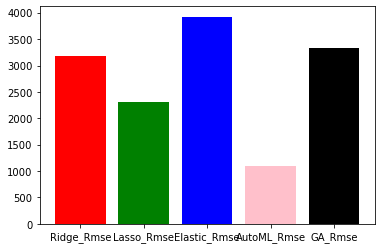

In [621]:
naming_Rmse = ['Ridge_Rmse', 'Lasso_Rmse', 'Elastic_Rmse', 'AutoML_Rmse', 'GA_Rmse']
Total_Rmse = [Ridge_Rmse, Lasso_Rmse, Elastic_Rmse, 1097.9465, 3327.143]
colors = ['red', 'g', 'b', 'pink', 'black']
plt.bar(naming_Rmse, Total_Rmse, color = colors)

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X_train = sm.add_constant(X_train)
model=sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

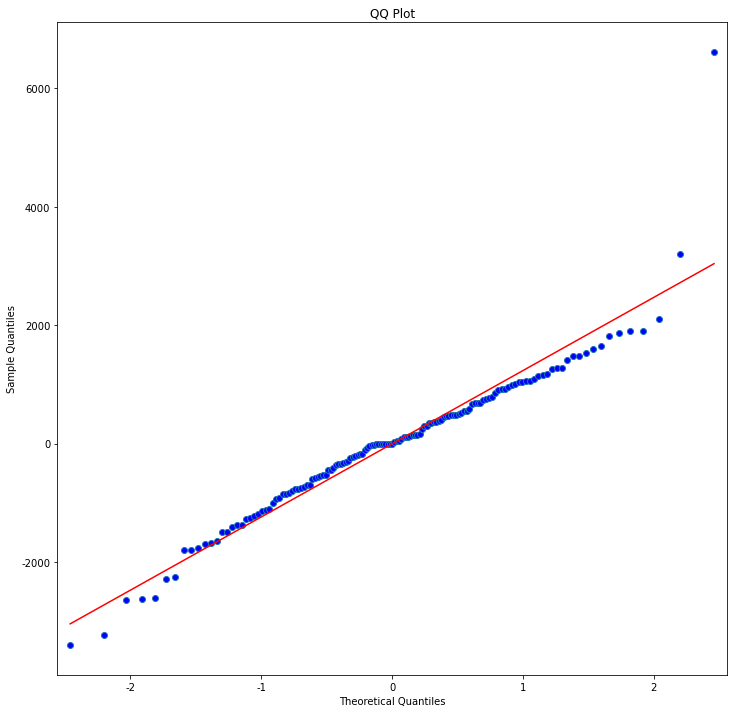

In [40]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

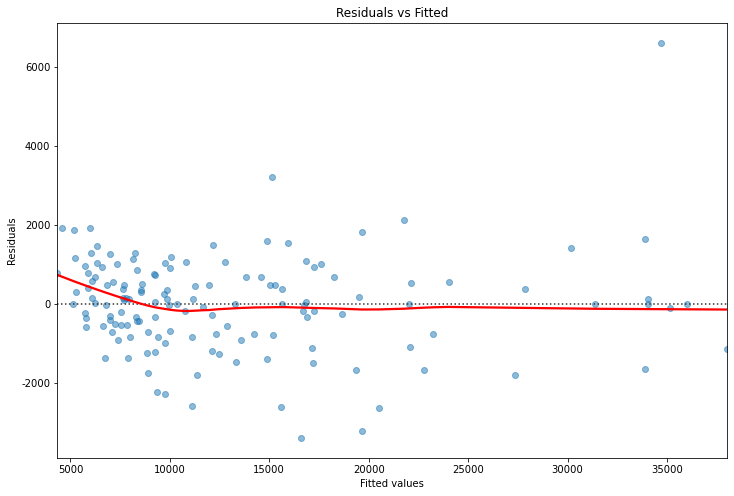

In [41]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [42]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.59
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.40e-49
Time:                        01:26:46   Log-Likelihood:                -1221.0
No. Observations:                 143   AIC:                             2558.
Df Residuals:                      85   BIC:                             2730.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3370

In [43]:
X_test = sm.add_constant(X_test)

In [45]:
y_test_pred = model_trained.predict(X_test)
y_test_pred.head()

160     8894.849003
186     9188.609772
59     10766.787684
165     8795.432113
140     4830.875255
dtype: float64

In [54]:
print(model_trained.rsquared_adj)

0.9578367496055022


In [51]:
def adj_r2_score(y_true, y_pred):
    return 1-(1-r2_score(y_true, y_pred)) * (len(y_true)-1) / (len(y_true) - p - 1)


In [55]:
model_trained.rsquared_adj

0.9578367496055022

In [495]:
gene = 68
pop = 20
first_list = []
last_list = []
for i in range(20):
    for j in range(68):
        first_list.append(random.randint(0,1))
    last_list.append(first_list)
    first_list=[]

df = pd.DataFrame(last_list)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1
1,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0
2,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,0,1,1,1,1,0,0
3,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,1,1,0
4,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0
5,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1
6,1,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0
7,1,0,0,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1
8,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1,0,0
9,1,0,0,0,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,1,1,0,1,1,1,1,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,0


In [496]:
def evaluation(chromos):
    
    r=[]
    for i in range(20):
        leave=[]
        for j in range(68):
            if chromos.iloc[i][j] == 1:
                leave.append(j)
        df_X=X_train.copy()
        df_y=y_train.copy()
        a=[df_X.columns[k] for k in leave]
        df_X=df_X[a]
        df_X = sm.add_constant(df_X)
        model=sm.OLS(df_y, df_X, axis=1)
        model_trained = model.fit()
        r.append(model_trained.rsquared_adj)
    
    return r

In [497]:
total=[]
def generate(chromos):
    
    generation=0
    maxx=[]
    for _ in range(100):
        
        
        p=pd.DataFrame()
        s=pd.Series(data=evaluation(chromos))
        num=4
        tmp=sorted(evaluation(chromos).copy())[-num:]
        tmp
        ind = []
        for e in range(len(evaluation(chromos))):
            if evaluation(chromos)[e] in tmp:
                ind.append(e)
        hap=chromos.iloc[ind].values.tolist()

        for i in range(8):
            b=chromos.sample(2, replace=True, weights=s)
            switch_point=random.randrange(0,64)
            b=b.values.tolist()
            u1=b[0][:switch_point]+b[1][switch_point:]
            u2=b[1][:switch_point]+b[0][switch_point:]
            hap.append(u1)
            hap.append(u2)

        for h in range(4):
            mutation_chrom = random.randrange(0,20)
            for _ in range(4):
                mutation_gene = random.randrange(0,64)
                hap[mutation_chrom][mutation_gene]=1-hap[mutation_chrom][mutation_gene]
        
        generation+=1
        print(f'generation : {generation}')
        print(evaluation(chromos))
        maxx.append(max(evaluation(chromos)))
        total.append(hap)
        chromos=pd.DataFrame(hap)

       
    return maxx
        

In [498]:
evaluation(df)

[0.902467557522773,
 0.8386853236864731,
 0.872687700202452,
 0.8572776736087313,
 0.8736637676261141,
 0.8784209213537916,
 0.9125141100121192,
 0.9182915217144656,
 0.867418959788038,
 0.9275856393557904,
 0.8900867832569402,
 0.8566308619493532,
 0.9059774869799166,
 0.8865079140336241,
 0.8815276347765345,
 0.8453701079582783,
 0.8325002347044232,
 0.8652221513855418,
 0.7512009086534527,
 0.8743497339633569]

In [499]:
a=generate(df)
print(a)

generation : 1
[0.902467557522773, 0.8386853236864731, 0.872687700202452, 0.8572776736087313, 0.8736637676261141, 0.8784209213537916, 0.9125141100121192, 0.9182915217144656, 0.867418959788038, 0.9275856393557904, 0.8900867832569402, 0.8566308619493532, 0.9059774869799166, 0.8865079140336241, 0.8815276347765345, 0.8453701079582783, 0.8325002347044232, 0.8652221513855418, 0.7512009086534527, 0.8743497339633569]
generation : 2
[0.9125141100121192, 0.9182915217144656, 0.9275856393557904, 0.9244823792874142, 0.8924316631588144, 0.868934560005784, 0.9086104259773189, 0.8918554716993051, 0.9184104045875356, 0.7381006111858411, 0.8853674399289811, 0.8872533208968849, 0.8430181534654929, 0.7469837293622733, 0.9272938125690393, 0.7576881377517235, 0.7512009086534527, 0.9225820496751074, 0.8700910145098537, 0.9160463964440306]
generation : 3
[0.9275856393557904, 0.9244823792874142, 0.9272938125690393, 0.9225820496751074, 0.9125141100121192, 0.8696678769035235, 0.9345595478554823, 0.86564809378392

generation : 21
[0.9486576962359804, 0.9484140769884488, 0.9487993554088218, 0.9504305788837294, 0.9509709367413859, 0.9018867556932542, 0.938128039486888, 0.9372363826266917, 0.9434614628835369, 0.9488828281823796, 0.9491903784851883, 0.942308289605195, 0.9482796577895366, 0.9436984499026266, 0.9484114044192198, 0.9486576962359804, 0.9478003360102673, 0.9467203263089302, 0.9392430156487241, 0.9481630542552957]
generation : 22
[0.9504305788837294, 0.9509709367413859, 0.9488828281823796, 0.9491903784851883, 0.938128039486888, 0.9392337784599762, 0.9363655705161471, 0.9485484110557222, 0.9009284366065173, 0.950702652117496, 0.9471817266636748, 0.9478265423968243, 0.942308289605195, 0.9436984499026266, 0.9486576962359804, 0.9481630542552957, 0.9491903784851883, 0.9482796577895366, 0.9468957943642746, 0.9423104375263784]
generation : 23
[0.9350854024706837, 0.9509709367413859, 0.9491903784851883, 0.950702652117496, 0.9491903784851883, 0.9346799643186808, 0.942250082469792, 0.94810748678224

generation : 41
[0.9572338527787706, 0.955893513429533, 0.9572338527787706, 0.955757765383721, 0.9361922209283539, 0.9470021840040911, 0.9483112034990393, 0.9476066630183702, 0.9433866624490163, 0.9568037414740235, 0.9313255303342576, 0.952437999259669, 0.9565623356876545, 0.9419655775847678, 0.9505544061764059, 0.9511896713679981, 0.9528855586889947, 0.9582839322216771, 0.9191254474712117, 0.9518944114878798]
generation : 42
[0.9572338527787706, 0.955434724282862, 0.9568037414740235, 0.9582839322216771, 0.955757765383721, 0.9565206229929769, 0.9533990026738084, 0.9452448878234944, 0.9572338527787706, 0.952437999259669, 0.9399934294094683, 0.9524109712448927, 0.9477097506595442, 0.9254160328726426, 0.9571189016988824, 0.9536014952650593, 0.9482378687524652, 0.9582839322216771, 0.9561724761484308, 0.9484320367082039]
generation : 43
[0.9572338527787706, 0.9535745789766993, 0.9493021904410553, 0.9582839322216771, 0.955757765383721, 0.9533990026738084, 0.9560411895285351, 0.94413682942841

generation : 61
[0.9606971686308482, 0.9573445263918121, 0.9595575933279596, 0.9585805547553846, 0.9434189577233599, 0.9521096025775704, 0.9583741964625007, 0.95736691010693, 0.95003808959205, 0.9550186485859404, 0.9362313449671659, 0.9556298449173323, 0.9416689063934311, 0.9229043797348669, 0.9411397060537913, 0.9497195151648401, 0.9474276060438962, 0.9543305068821117, 0.9564242108598993, 0.9345647798572283]
generation : 62
[0.9606971686308482, 0.9320322049013321, 0.9585805547553846, 0.9584635881809995, 0.9432793306865391, 0.9460655507610105, 0.9573410009475729, 0.9576076275892208, 0.9582541048237324, 0.9555423155030184, 0.95003808959205, 0.9416689063934311, 0.9493579727918263, 0.9506156602091593, 0.9443031621637179, 0.946582919142258, 0.9158934386169317, 0.947531694350443, 0.95736691010693, 0.9595575933279596]
generation : 63
[0.9606971686308482, 0.9585805547553846, 0.9584635881809995, 0.9595575933279596, 0.9572560395275341, 0.9579134592680529, 0.9320322049013321, 0.9569494971668889,

generation : 81
[0.9611197150074301, 0.9598759926946452, 0.9611158781608443, 0.9611158781608443, 0.9611158781608443, 0.9472831772891055, 0.9273369346180832, 0.9536019405817415, 0.951671040311581, 0.9570902445356452, 0.9590622174125164, 0.9590622174125164, 0.9496247000960977, 0.9590445588776382, 0.945419086045003, 0.9565710297710855, 0.9451536913466622, 0.950977294850567, 0.9609392726247469, 0.9611158781608443]
generation : 82
[0.9611197150074301, 0.9611158781608443, 0.9607310146805645, 0.9611158781608443, 0.9611158781608443, 0.9611158781608443, 0.9611158781608443, 0.9611158781608443, 0.9451536913466622, 0.9534894053888339, 0.9607584350431436, 0.9588105410431654, 0.9472177695128281, 0.9570902445356452, 0.9496247000960977, 0.9569686191791246, 0.9538508468883151, 0.958104585800355, 0.9589117080012319, 0.9590622174125164]
generation : 83
[0.9611197150074301, 0.9611158781608443, 0.9611158781608443, 0.9611158781608443, 0.9611158781608443, 0.9607694058257963, 0.9611158781608443, 0.96111587816

[0.9275856393557904, 0.9275856393557904, 0.9345595478554823, 0.9393488933923126, 0.9393488933923126, 0.9403670491242515, 0.9403670491242515, 0.9432871221985641, 0.9432871221985641, 0.9438041120359631, 0.946644382492019, 0.9485258016854097, 0.9485258016854097, 0.9485258016854097, 0.9469088559073757, 0.9469088559073757, 0.9486576962359804, 0.9486576962359804, 0.9487344362991286, 0.9504305788837294, 0.9509709367413859, 0.9509709367413859, 0.9509709367413859, 0.9529586904378473, 0.9529586904378473, 0.9529586904378473, 0.9529586904378473, 0.9529586904378473, 0.9561831469780175, 0.9561831469780175, 0.9569753064580417, 0.9569753064580417, 0.9558800671926955, 0.9558800671926955, 0.9558800671926955, 0.9572338527787706, 0.9572338527787706, 0.9572338527787706, 0.9572338527787706, 0.9572338527787706, 0.9582839322216771, 0.9582839322216771, 0.9586384146110144, 0.9587096071375365, 0.9594594367589029, 0.9594594367589029, 0.9594594367589029, 0.9594594367589029, 0.9591726369312393, 0.9591726369312393, 

In [245]:
generation=0
maxx=[]
for _ in range(50):
    print(f'generation : {generation}')
    print(generate(df))
    print(evaluation(generate(df)))
    maxx.append(max(evaluation(generate(df))))
    generation+=1
    
    

generation : 0
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   1   0   0   0   1   1   0   1   0   0   0   1   0   0   1   1   
5    0   1   1   0   1   1   0   0   1   1   0   1   1   0   1   0   1   0   
6    0   1   1   0   1   1   0   0   1   1   0   1   1   0   1   0   1   0   
7    0   1   1   0   1   1   0   0   1   1   0   1   1   0   1   0   1   0   
8    0   1   0   0   0   1   1   1   1   0   0   0   1   0   0   1   1   0   
9    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
10   1   1   0   0   0   0   0   0   0   1   1   1   0   1   0   0   1   1   
11   1   1   0   0   0   0   1   1   1   1   0   

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8784963598097804, 0.858392305694017, 0.91396335305234, 0.91396335305234, 0.8474114939015771, 0.9293068745698322, 0.8289696285420214, 0.8847916586358577, 0.8718069010881178, 0.8941154620009523, 0.8599580578296089, 0.9280731886211158, 0.9133954593174539, 0.881011043048622, 0.9144572925812325, 0.8398721644951888]
generation : 2
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   0   0   0   1   1   1   1   0   0   0   1   0   0   1   1   0   
5    0   1   1   1   1   0   1   1   1   1   0   1   1   0   0   1   1   1   
6    1   0   0   1   0   0   0   1   1   1   1

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8497725691916473, 0.9144533380436561, 0.8831951293874463, 0.9082456368356427, 0.9058849776781683, 0.872661193985986, 0.91396335305234, 0.91396335305234, 0.8832246132136051, 0.8832246132136051, 0.8758439828678078, 0.8974318899347169, 0.9165870907759691, 0.8362311562449251, 0.9465677159410064, 0.9062405122047168]
generation : 4
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   0   0   1   0   0   1   0   0   0   1   1   0   1   1   1   0   0   
5    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   1   
6    0   1   1   0   0   0   1   1   0   1   

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8390184968829701, 0.8682523154711265, 0.8574831164095018, 0.8712903432880632, 0.7286433546385995, 0.8628867085007055, 0.9201800350449182, 0.8773245042561345, 0.8778859131349132, 0.8782327842125205, 0.9015255111215936, 0.8878636149500732, 0.9303295484193151, 0.8964225185245812, 0.9082549303270346, 0.8857178675538051]
generation : 6
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   0   1   1   1   0   0   0   1   1   1   0   1   1   0   0   0   
5    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
6    0   0   0   0   0   0   0   1   0  

[0.9133954593174539, 0.9252258710750086, 0.931821693000286, 0.91396335305234, 0.8849643424528507, 0.8784062405453363, 0.8431368539396744, 0.8689777318196129, 0.9281401474439991, 0.8845245450498745, 0.6539962267374531, 0.8893831361436786, 0.91396335305234, 0.91396335305234, 0.9093205530650541, 0.8838421759084653, 0.9165371898491042, 0.8940954604942065, 0.8768345696959414, 0.8768345696959414]
generation : 8
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    0   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    1   0   1   1   1   0   0   0   0   0   0   1   1   1   0   0   0   0   
5    1   0   0   0   0   0   0   1   0   1   0   0   1   0   0   1   1   1   
6    0   1   0   0   0   1   1   1   1   0   

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.877510635718115, 0.8478799837406067, 0.8570267043393167, 0.894955066947231, 0.8415823092257617, 0.89659261095156, 0.877461756163141, 0.9151558065895479, 0.8867628316469163, 0.9095829249898453, 0.8861978926404583, 0.8638312422373557, 0.8678429849723661, 0.9237026117583054, 0.8494383354838347, 0.8654632630039074]
generation : 10
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   1   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   0   0   0   1   1   1   1   0   0   0   1   0   0   1   1   0   
5    0   0   0   1   0   0   1   0   0   0   1   1   0   1   1   1   0   1   
6    0   1   0   0   1   1   1   0   1   0  

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.9252258710750086, 0.8764436999192237, 0.9180699909949279, 0.7819969046081133, 0.8940954604942065, 0.9158718360207891, 0.8423069849620872, 0.8816831780651728, 0.8449879887994368, 0.8784811042261885, 0.8867562153223181, 0.8467883004281144, 0.8132455690789817, 0.9198999445074995, 0.8959508845285153, 0.8733435417349]
generation : 12
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   0   0   0   1   1   1   1   0   0   0   1   0   0   1   1   0   
5    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
6    1   1   0   0   0   0   1   1   1   1

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.9304319619073858, 0.9304319619073858, 0.8459289473419749, 0.9025751514002155, 0.9252258710750086, 0.9252258710750086, 0.9136803383857972, 0.802412520390191, 0.8964247964504996, 0.8796563968085221, 0.924901884918683, 0.8790213230254943, 0.8835581386146771, 0.780955453482999, 0.8962071106258395, 0.8721218958998532]
generation : 14
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   0   0   1   0   0   0   1   1   1   1   1   0   1   1   0   1   0   
5    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
6    0   1   0   0   0   0   0   0   0   1

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.9133954593174539, 0.8865012990451901, 0.8853138881064604, 0.8853138881064604, 0.9251883894047279, 0.9065832280577267, 0.9073015840862082, 0.888740324904753, 0.6907871346089662, 0.8675518473895583, 0.8637372433194888, 0.9005169159524429, 0.881011043048622, 0.8494383354838347, 0.9079010303150687, 0.8979283618958305]
generation : 16
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   0   0   0   0   0   0   1   0   1   0   0   1   0   1   1   0   1   
5    1   0   0   1   1   0   0   0   0   0   0   1   1   1   0   0   0   1   
6    1   1   0   1   1   1   0   0   1   

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8816356383724336, 0.752353747046966, 0.896362624899616, 0.8771570816273948, 0.8831951293874463, 0.9082456368356427, 0.7255906273908248, 0.8693498746278675, 0.8770983795799566, 0.8586381186574163, 0.9250581580358204, 0.7847691856519482, 0.9322276499730324, 0.8726684297314643, 0.8568421105675872, 0.8465739535387942]
generation : 18
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
5    0   1   1   1   1   0   0   0   1   0   1   0   1   1   1   1   1   1   
6    0   0   1   1   0   1   1   1   0   

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8779610013906526, 0.8837914465079132, 0.9190193059300097, 0.7021248353975824, 0.9240362410528292, 0.7799588932665977, 0.8622783245220618, 0.8792233579842013, 0.8162925992447968, 0.8894994952766889, 0.8686947878531803, 0.86460510868339, 0.869038976916551, 0.8782372146306893, 0.921285324167779, 0.812774427202041]
generation : 20
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   0   0   1   0   0   0   1   1   1   1   1   0   1   1   0   1   0   
5    0   1   0   1   0   1   0   1   0   1   0   0   0   1   0   0   1   0   
6    1   0   0   0   0   0   0   1   0   1  

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8859521095033256, 0.8620425283325461, 0.8270615550259525, 0.8795222136119341, 0.9252458667438231, 0.8127148908553881, 0.853500365940465, 0.89920170192731, 0.8827493829367651, 0.9131049257406513, 0.9265502419337278, 0.8821923297870968, 0.8534069618239448, 0.864479456564451, 0.7983797952997208, 0.900792256570595]
generation : 22
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   1   1   1   0   0   0   1   0   1   0   1   1   1   1   1   1   
5    0   1   0   1   0   1   0   1   0   1   0   0   0   1   0   0   1   0   
6    1   0   0   0   0   0   0   1   0   1  

[0.9133954593174538, 0.9252258710750086, 0.9242831430895513, 0.91396335305234, 0.6564530464637559, 0.8719922654379646, 0.8099200857966351, 0.9278069902104393, 0.9289580669778014, 0.6792688664059714, 0.914301910390885, 0.8658871347779324, 0.8837914465079132, 0.8779610013906526, 0.8768383937041858, 0.9176593123868054, 0.9189467576422317, 0.8894185068013706, 0.8779894032786666, 0.8678923770897589]
generation : 24
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    1   1   0   1   1   1   0   0   1   0   0   0   1   1   0   1   1   1   
5    0   1   1   1   1   0   1   1   1   1   0   1   1   0   0   1   1   1   
6    0   1   0   1   0   1   0   1   0  

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8901368435194914, 0.887923994184268, 0.9283149665648706, 0.7860470859621691, 0.889740807456911, 0.8884466349362565, 0.9137947742308627, 0.8634352931378457, 0.8385081448234234, 0.9121464920579935, 0.8722280430391087, 0.9042298541016026, 0.8386387634287421, 0.867376050342033, 0.9304319619073858, 0.8623836340696744]
generation : 26
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   1   0   0   0   1   1   0   1   0   0   0   1   0   0   1   1   
5    0   0   0   0   0   0   0   1   0   1   0   0   1   0   1   1   0   1   
6    1   1   0   1   1   0   1   1   1   0

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8848287673604796, 0.8586213041172785, 0.8735162456479952, 0.8672275110712856, 0.8809497201994108, 0.913258976990992, 0.8745681610200322, 0.8709635564396938, 0.8738786721041422, 0.8987930210500513, 0.8878750075591373, 0.9220957080572599, 0.8986809992882971, 0.8885913739143775, 0.9297032032176122, 0.8663890934741416]
generation : 28
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   1   0   
5    0   1   0   0   0   1   1   1   1   0   0   0   1   0   0   1   0   0   
6    0   1   1   1   1   0   0   1   0  

[0.9133954593174539, 0.9249638652512362, 0.9309087113258058, 0.91396335305234, 0.919160615132343, 0.855045623217384, 0.9023865582298549, 0.8854933943884626, 0.8475511231612702, 0.8792568267675702, 0.8731721745372782, 0.8587222312435803, 0.8839127895763901, 0.9003770296762277, 0.8568831810831206, 0.8738137455841857, 0.8764436999192237, 0.8764436999192237, 0.8623836340696744, 0.8623836340696744]
generation : 30
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   0   1   0   1   0   1   0   1   0   1   0   1   0   0   1   1   
5    1   1   0   0   0   0   1   1   1   1   1   0   0   1   0   0   1   0   
6    0   1   0   0   0   1   1   1   1   

[0.9133954593174539, 0.923328452922092, 0.9304319619073858, 0.91396335305234, 0.8205501481650315, 0.8781245804659583, 0.8550430647639915, 0.8747350428223631, 0.9280339820293544, 0.835015036427423, 0.9113524471528015, 0.925676176657259, 0.9002804159617073, 0.8954771010200755, 0.9032445438307851, 0.9037066565021927, 0.8919368381674728, 0.9294375332872136, 0.8471141339755192, 0.900574080067707]
generation : 32
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   2   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
5    0   0   0   1   0   0   1   0   0   0   1   1   0   1   1   1   0   1   
6    1   1   0   0   0   0   1   1   1   1 

[0.9133954593174539, 0.9252258710750086, 0.9308345052149646, 0.91396335305234, 0.9133954593174539, 0.9050217453414993, 0.91396335305234, 0.9252258710750086, 0.8792824066219689, 0.908018447811601, 0.8974251030706892, 0.8015653420213813, 0.8694406744304739, 0.8897270804919262, 0.920678326164071, 0.8323588432125668, 0.9253999796047938, 0.9251414505605148, 0.8971575982559307, 0.8853138881064604]
generation : 34
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   0   0   0   0   0   0   1   0   1   0   0   1   0   1   1   0   1   
5    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
6    0   0   0   1   1   0   1   1   1   0 

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8389536110588598, 0.9175429795916012, 0.9240587377231074, 0.8404470033267009, 0.8834476731991521, 0.9029296225681076, 0.8832246132136051, 0.8832246132136051, 0.918442344537265, 0.8640666733506693, 0.851029109772536, 0.8981265421616762, 0.8971575982559307, 0.8620425283325461, 0.879403447080144, 0.8776879966450833]
generation : 36
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   1   0   0   0   1   1   0   1   0   0   0   1   0   0   1   1   
5    0   1   1   0   1   1   0   0   1   1   0   1   1   0   1   0   1   0   
6    0   0   0   1   1   0   1   1   1   0

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.7615835648571152, 0.8583446623972713, 0.8855012526320796, 0.8565937193944886, 0.886803809851563, 0.8778126209676277, 0.6569125060263332, 0.8876856286187838, 0.8929586956057332, 0.9129407340189634, 0.9244848753726508, 0.8787516991312424, 0.87011092788313, 0.8687611609883106, 0.863590734176526, 0.8045756614912718]
generation : 38
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
5    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
6    0   0   1   1   0   1   1   1   0   0 

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8831533778651403, 0.8859453026388562, 0.9239496080766554, 0.859377523099642, 0.89659261095156, 0.8905799012330576, 0.8219843344038575, 0.8721978995238879, 0.8702331901930822, 0.8744972303048076, 0.8115453815405854, 0.9248242199651111, 0.8747039247138414, 0.9144533380436561, 0.91396335305234, 0.9050217453414993]
generation : 40
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   0   0   1   0   0   1   0   0   0   1   1   0   1   1   1   0   1   
5    0   1   0   1   0   1   0   1   0   1   0   0   0   1   0   0   1   0   
6    0   0   0   1   1   0   1   1   1   0  

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8643614943235389, 0.9258869920401956, 0.8962071106258395, 0.8721218958998532, 0.9199035725367157, 0.9111270923547169, 0.8908213217499439, 0.8480093929348763, 0.9050515787914376, 0.8790670806285541, 0.8314066701637202, 0.8822982100855872, 0.856625176872422, 0.8789369513181067, 0.8583647069319136, 0.8768462076312691]
generation : 42
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   0   0   1   0   0   1   0   1   0   0   1   0   1   1   0   1   
5    0   0   0   0   0   1   1   0   1   0   0   0   1   0   0   0   1   0   
6    1   1   0   0   0   0   1   1   1  

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8659773733033611, 0.8391093803156018, 0.9083378831086832, 0.8900896673903698, 0.8623836340696744, 0.9304319619073858, 0.8936835638060573, 0.9165054330403424, 0.8853893950709446, 0.8584954459653843, 0.9100895738143536, 0.871518703473633, 0.9133954593174539, 0.9133954593174539, 0.8676279410281024, 0.9254739899999455]
generation : 44
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   0   0   0   0   0   0   1   0   1   0   0   1   0   1   1   0   1   
5    0   1   0   1   0   1   0   1   0   1   0   0   0   1   0   0   1   0   
6    0   0   0   1   0   0   1   0   0  

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.9017532942106672, 0.8451177254069369, 0.8697583441422438, 0.8677053662433866, 0.8708430959959463, 0.7027163485150971, 0.8684992694969461, 0.8688368508054334, 0.8832246132136051, 0.8623836340696744, 0.7412933356005912, 0.8965172497073994, 0.8966748411997463, 0.8899923916173398, 0.7637481200359747, 0.9127179175087882]
generation : 46
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   1   0   1   1   0   0   1   1   0   1   1   0   1   0   1   0   
5    0   1   0   1   0   1   0   1   0   1   0   0   0   1   0   0   1   0   
6    1   1   0   1   1   1   0   0   1 

[0.9083071308902633, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.863690961071234, 0.9072471430814458, 0.8149087108263582, 0.8610006579779652, 0.9304319619073858, 0.8654632630039074, 0.9018269077970946, 0.8945566501083193, 0.8782975167055408, 0.8652469870791231, 0.9295202505890956, 0.7111127332925657, 0.925899595435813, 0.8710340145419779, 0.8799301768837449, 0.8720527166417877]
generation : 48
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
1    0   0   1   1   0   1   1   1   0   0   0   0   1   1   0   1   0   0   
2    1   1   0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   0   
3    1   0   1   0   0   0   1   0   0   0   0   0   1   0   1   0   0   0   
4    0   1   0   0   1   1   1   0   1   0   0   0   1   0   0   0   1   0   
5    1   1   0   1   1   1   0   0   1   0   0   0   1   1   0   1   1   1   
6    0   0   0   0   0   0   0   1   0   

[0.9133954593174539, 0.9252258710750086, 0.9304319619073858, 0.91396335305234, 0.8465406147071253, 0.8854145434349052, 0.8807355706531905, 0.8515201793710915, 0.9304319619073858, 0.9304319619073858, 0.8471469147812458, 0.901688250974205, 0.8015182489918351, 0.8894755565857441, 0.8859521095033256, 0.8832246132136051, 0.8947749121073163, 0.8905495043756951, 0.8774188905532617, 0.886141275726453]


In [204]:
num=4
tmp=sorted(evaluation(df).copy())[-num:]
tmp
ind = []
for e in range(len(evaluation(df))):
    if evaluation(df)[e] in tmp:
        ind.append(e)
ind

[4, 5, 6, 10]

0.9614781563346726 89


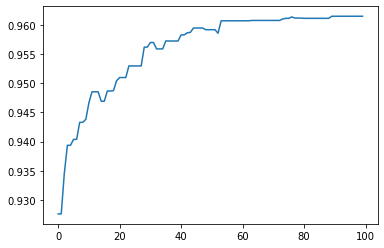

In [500]:
plt.plot(a)
print(max(a), np.argmax(a))

In [501]:
final=total[99][0]

In [504]:
index_=[]
for d in range(len(final)):
    if final[d]==0:
        index_.append(d)
index_

[9,
 11,
 15,
 16,
 20,
 26,
 28,
 32,
 36,
 41,
 42,
 44,
 45,
 47,
 49,
 50,
 53,
 54,
 55,
 56,
 62,
 64,
 65]

In [505]:
X_train.columns[index_]

Index(['horsepower', 'citympg', 'symboling_1', 'symboling_2', 'doornumber_two',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohcv',
       'cylindernumber_six', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'car_company_audi',
       'car_company_buick', 'car_company_chevrolet', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mercury',
       'car_company_renault', 'car_company_subaru', 'car_company_toyota'],
      dtype='object')

In [506]:
X_train=X_train.drop(columns=['horsepower', 'citympg', 'symboling_1', 'symboling_2', 'doornumber_two',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohcv',
       'cylindernumber_six', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'car_company_audi',
       'car_company_buick', 'car_company_chevrolet', 'car_company_isuzu',
       'car_company_jaguar', 'car_company_mazda', 'car_company_mercury',
       'car_company_renault', 'car_company_subaru', 'car_company_toyota'], axis=1)

In [507]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_mfi',
       'fuelsystem_spfi', 'car_company_bmw', 'car_company_dodge',
       'car_company_honda', 'car_company_mitsubishi', 'car_company_nissan',
       'car_company_peugeot', 'car_company_plymouth', 'car_company_porsche',
       'car_company_saab', 'car_company_volkswagen', 'car_company_volvo'],
      dtype='object')

In [508]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

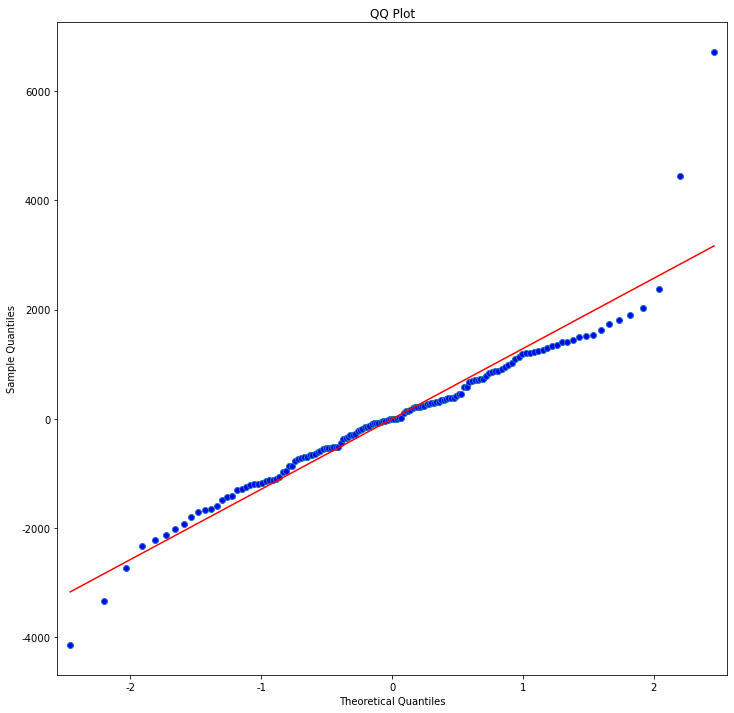

In [509]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

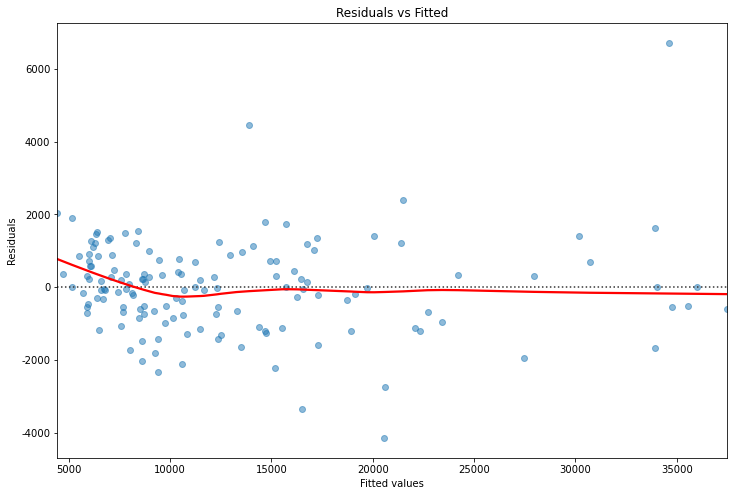

In [510]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [511]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     87.44
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           7.67e-63
Time:                        19:40:43   Log-Likelihood:                -1226.9
No. Observations:                 143   AIC:                             2538.
Df Residuals:                     101   BIC:                             2662.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.60

In [515]:
X_test = sm.add_constant(X_test)

In [516]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test, y_test_pred))

15.935497739219684


In [517]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 11069877.525
Testing RMSE: 3327.143
Testing MAE: 2030.953
Testing MAPE: 15.935
Testing R2: 0.842


In [166]:
p=h[0][:30]+h[1][30:]

p

[1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1]

In [117]:
def _generate_parent(length, geneSet, get_fitness):
    chromosome_list = []
    for i in range(0, 20):
        genes = []
        while len(genes) < length:
            sampleSize = min(length - len(genes), len(geneSet))
            genes.extend(random.sample(geneSet, sampleSize))
        fitness = get_fitness(genes)
        chromosome_list.append(Chromosome(genes, fitness))
    return chromosome_list


In [ ]:
def generate_child(parent_list, geneSet, get_fitness):
    

In [125]:
p=pd.DataFrame()